# King County Housing Data

In the following project, we will examine and analyze data from housing sales in King County, Washington. We will employ the OSEMN (obtain, scrub, explore, model, and interpret) data science process to determine the effect of various features on housing sales prices via a multivariate linear model.

## Obtaining the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
%matplotlib inline

In [2]:
housing = pd.read_csv('kc_house_data.csv')
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
housing.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
date = pd.to_datetime(housing['date'])
housing['month_sold'] = date.dt.month
housing['year_sold'] = date.dt.year
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,2015


Upon first importing the data, we can examine a few records, information about each feature, and descriptive statistics for our continuous variables to notice important initial trends. The housing data for King County contains 21 variables of information for each record, and the entire data set contains 21597 records. In the first five rows, we can see some null values that will need to be addressed as we scrub the data before proceeding with analysis. Many of the variables (such as 'sqft_living' and 'sqft_lot') seem to be related and thus may be highly correlated, resulting in collinearity obstacles throughout our modeling process.

'waterfront', 'view', and 'yr_renovated' are the only three columns with null values. To eliminate these null occurences, more information about the context and meaning of 'waterfront' and 'view' is necessary. For 'yr_renovated', we will add an additional column named 'yrs_since_renovation'. Null values in the original column will be replaced with 'missing', while null values in the new column will be changed to the number of years since the house was built, since a null value most likely indicates that no renovation has ever occurred, and this will allow us to examine if the relative newness of the house's appearance, appliances, etc. has any affect on its selling price. Additionally, another additional column titled 'yrs_since_built' will be created similarly from 'yr_built' in order to better indicate trends associated with the age of the house and its selling price.

'id' should be dropped from the dataset, as it provides insignificant information as an indicator in relation to the target variable, 'price'. 'date' is ineffective as in an indicator in its current format and has been reformatted as new columns 'month_sold' and 'year_sold' for each record. 'floors', 'bedrooms', 'bathrooms', 'waterfront', 'view', 'condition', 'grade', 'zipcode', 'yr_built', and 'yr_renovated' appear to be categorical variables and should be converted using one hot methods. 'sqft_basement' is incorrectly coded as an object datetype and should be cast as an float type instead. 'sqft_above' and 'sqft_basement' may be more appropriately coded as a ratio of 'sqft_basement_per_above', or with this ratio added as an additional column. As we process and continue to examine the data, other transformations may become necessary as well in order to most effectivley explore and model the data.

# Scrubbing the Data

## 'waterfront'

In [7]:
housing['waterfront'].unique()

array([nan,  0.,  1.])

Here, we notice that '0' and '1' are the only unique non-null values for 'waterfront'. The mean for 'waterfront' is 0.007, indicating many more counts of '0' within our data than of '1'. Thus, we can assume that a null value most likely means the house is not waterfront, and null values can be replace with '0'. The validity of our data should not be affected by this changed based on observations of the mean.

In [8]:
housing['waterfront'].fillna(0, inplace=True)

In [9]:
housing['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

Value counts of 'waterfront' indicate that all null values have been appropriately replaced.

## 'view'

In [10]:
housing['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

Here, we notice that the unique non-null values for 'view' are the range of integers from 0-4. The mean for 'view' is slightly higher than 'waterfront' at 0.234, but the five-number analysis still indicates many more counts of '0' than any other value, with even the 75% mark at '0.0'. The mean is most likely skewed higher by the presence of some larger values of '2', '3', and '4'. Thus, we can assume that a null value most likely means the house has not received any viewss, and null values can be replace with '0'. The validity of our data should not be affected by this changed based on observations of the mean.

In [11]:
housing['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [12]:
housing['view'].fillna(0, inplace=True)

Value counts of 'view' indicate that all null values have been appropriately replaced.

## 'yr_since_renovation'

In [13]:
housing['yr_since_renovation'] = housing['yr_renovated']

In [14]:
housing['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [15]:
housing['yr_renovated'].fillna('missing', inplace=True)
housing['yr_since_renovation'].fillna(0, inplace=True)

In [16]:
housing['yr_since_renovation'].replace(to_replace=0, value=housing['yr_built'], inplace=True)

Above, we create an additional column named 'yr_since_renovation', based upon 'yr_renovated. Null values in the original column are replaced with 'missing', as we have no knowledge of any existing renovation. For the sake of our analysis, null values in 'yr_since_renovation' are filled with '0', then replaced with 'yr_built', as no existing renovation indicates that the age of the house's features most align with the original construction date.

In [17]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,yr_since_renovation
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,1955.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,1991.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,missing,98028,47.7379,-122.233,2720,8062,2,2015,1933.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,1965.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,1987.0


In [18]:
housing['yr_since_renovation'] = housing['year_sold']-housing['yr_since_renovation']

Now, we replace all values in 'yr_since_renovation' with the length of time since that renovation has taken place, by subtracting the original values from 2018. We create this column to examine whether any correlation exists between the length of time since features of the house have been replaced and the selling price of the house.

In [19]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,yr_since_renovation
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,59.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,23.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,missing,98028,47.7379,-122.233,2720,8062,2,2015,82.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,49.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,28.0


In [20]:
housing.isna().sum()

id                     0
date                   0
price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront             0
view                   0
condition              0
grade                  0
sqft_above             0
sqft_basement          0
yr_built               0
yr_renovated           0
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
month_sold             0
year_sold              0
yr_since_renovation    0
dtype: int64

The two cells above indicate that all null values have been replaced and no further null values exist within our data. We also notice the new column created as our 22nd variable.

## 'yr_since_built'

Similarly to 'yr_since_renovation', we create another new column 'yr_since_built' from 'yr_built'. We use a similar process, so that we can better examine the age of the house during our EDA. It should be noted that these two variables may be very correlated and might be removed during our modeling process due to collinearity issues.

In [21]:
housing['yr_since_built'] = housing['year_sold']-housing['yr_built']

## Further Scrubbing

Below, we drop 'id' and 'date', as they do not provide data relevant to our questions about the housing data in our exploratory data analysis.

We notice issues when attempting to convert 'sqft_basement' to a float datatype, and uncover the presence of many '?' values. Thus, replace these values with the median of all other values for the 'sqft_basement' variable. This replacement should not affect the distribution of the feature or its correlation with our target variable, 'price'. Then, we can properly convert the column to a 'float64' datatype.

We create another additional column 'sqft_basement_per_above' as an indication of the ratio between basement space and living space above ground. The smaller this ratio, the more space the house provides above ground, which may be more appealing to buyers. It will be interesting to see if a correlation exists between this variable and 'price'.

The number of bathrooms, bedrooms, and floors may not provide an accurate representation of the property without taking into account the size of the house as well. Thus, we create three additional ratio-based features - 'bedrooms_per_size', 'bathrooms_per_size', and 'floors_per_size'- by dividing the original three columns by 'sqft_living15'. Just like the other new variables, these features may provide interesting insight into correlation with 'price' (or possibly not!), but may need to be removed later on due to high multicollinearity.

Finally, we convert the categorical features 'floors', 'bedrooms', 'bathrooms', 'waterfront', 'view', 'condition', 'grade', 'zipcode', 'yr_built', and 'yr_renovated' to string datatypes, in preparation for our EDA.

In [22]:
to_drop = ['id', 'date']
housing.drop(to_drop, axis=1, inplace=True)

In [23]:
median = np.median(housing['sqft_basement']!='?')
housing['sqft_basement'].replace(to_replace='?', value=median, inplace=True)

In [24]:
housing['sqft_basement'] = housing['sqft_basement'].astype('float64')

In [25]:
housing['sqft_basement_per_above']=housing['sqft_basement']/housing['sqft_above']

In [26]:
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,yr_since_renovation,yr_since_built,sqft_basement_per_above
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,98178,47.5112,-122.257,1340,5650,10,2014,59.0,59,0.000000
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,98125,47.7210,-122.319,1690,7639,12,2014,23.0,63,0.184332
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,98028,47.7379,-122.233,2720,8062,2,2015,82.0,82,0.000000
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,98136,47.5208,-122.393,1360,5000,12,2014,49.0,49,0.866667
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,98074,47.6168,-122.045,1800,7503,2,2015,28.0,28,0.000000


In [27]:
housing['bedrooms_per_size'] = housing['bedrooms']/housing['sqft_living15']
housing['bathrooms_per_size'] = housing['bathrooms']/housing['sqft_living15']
housing['floors_per_size'] = housing['floors']/housing['sqft_living15']
housing.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,sqft_lot15,month_sold,year_sold,yr_since_renovation,yr_since_built,sqft_basement_per_above,bedrooms_per_size,bathrooms_per_size,floors_per_size
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,1340,5650,10,2014,59.0,59,0.000000,0.002239,0.000746,0.000746
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,1690,7639,12,2014,23.0,63,0.184332,0.001775,0.001331,0.001183
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,2720,8062,2,2015,82.0,82,0.000000,0.000735,0.000368,0.000368
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,1360,5000,12,2014,49.0,49,0.866667,0.002941,0.002206,0.000735
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,1800,7503,2,2015,28.0,28,0.000000,0.001667,0.001111,0.000556


Convert categorical data:

In [28]:
categorical_data = ['floors','bedrooms','bathrooms','waterfront','view','condition',
                    'grade','zipcode','yr_built','yr_renovated']
for feature in categorical_data:
    housing[feature] = housing[feature].astype('str')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
price                      21597 non-null float64
bedrooms                   21597 non-null object
bathrooms                  21597 non-null object
sqft_living                21597 non-null int64
sqft_lot                   21597 non-null int64
floors                     21597 non-null object
waterfront                 21597 non-null object
view                       21597 non-null object
condition                  21597 non-null object
grade                      21597 non-null object
sqft_above                 21597 non-null int64
sqft_basement              21597 non-null float64
yr_built                   21597 non-null object
yr_renovated               21597 non-null object
zipcode                    21597 non-null object
lat                        21597 non-null float64
long                       21597 non-null float64
sqft_living15              21597 non-null int64
sqft_lot1

A final look at the info for our features indicates that all variables have been properly coded and we are ready to begin our exploratory data analysis.

# Exploring the Data

## How does living space affect the selling price?

Below, we plot all continuous variables related to the living space of the house against the selling price. We might expect that larger homes, with more bedrooms, bathrooms, and floors, may sell at higher prices than those that are smaller.

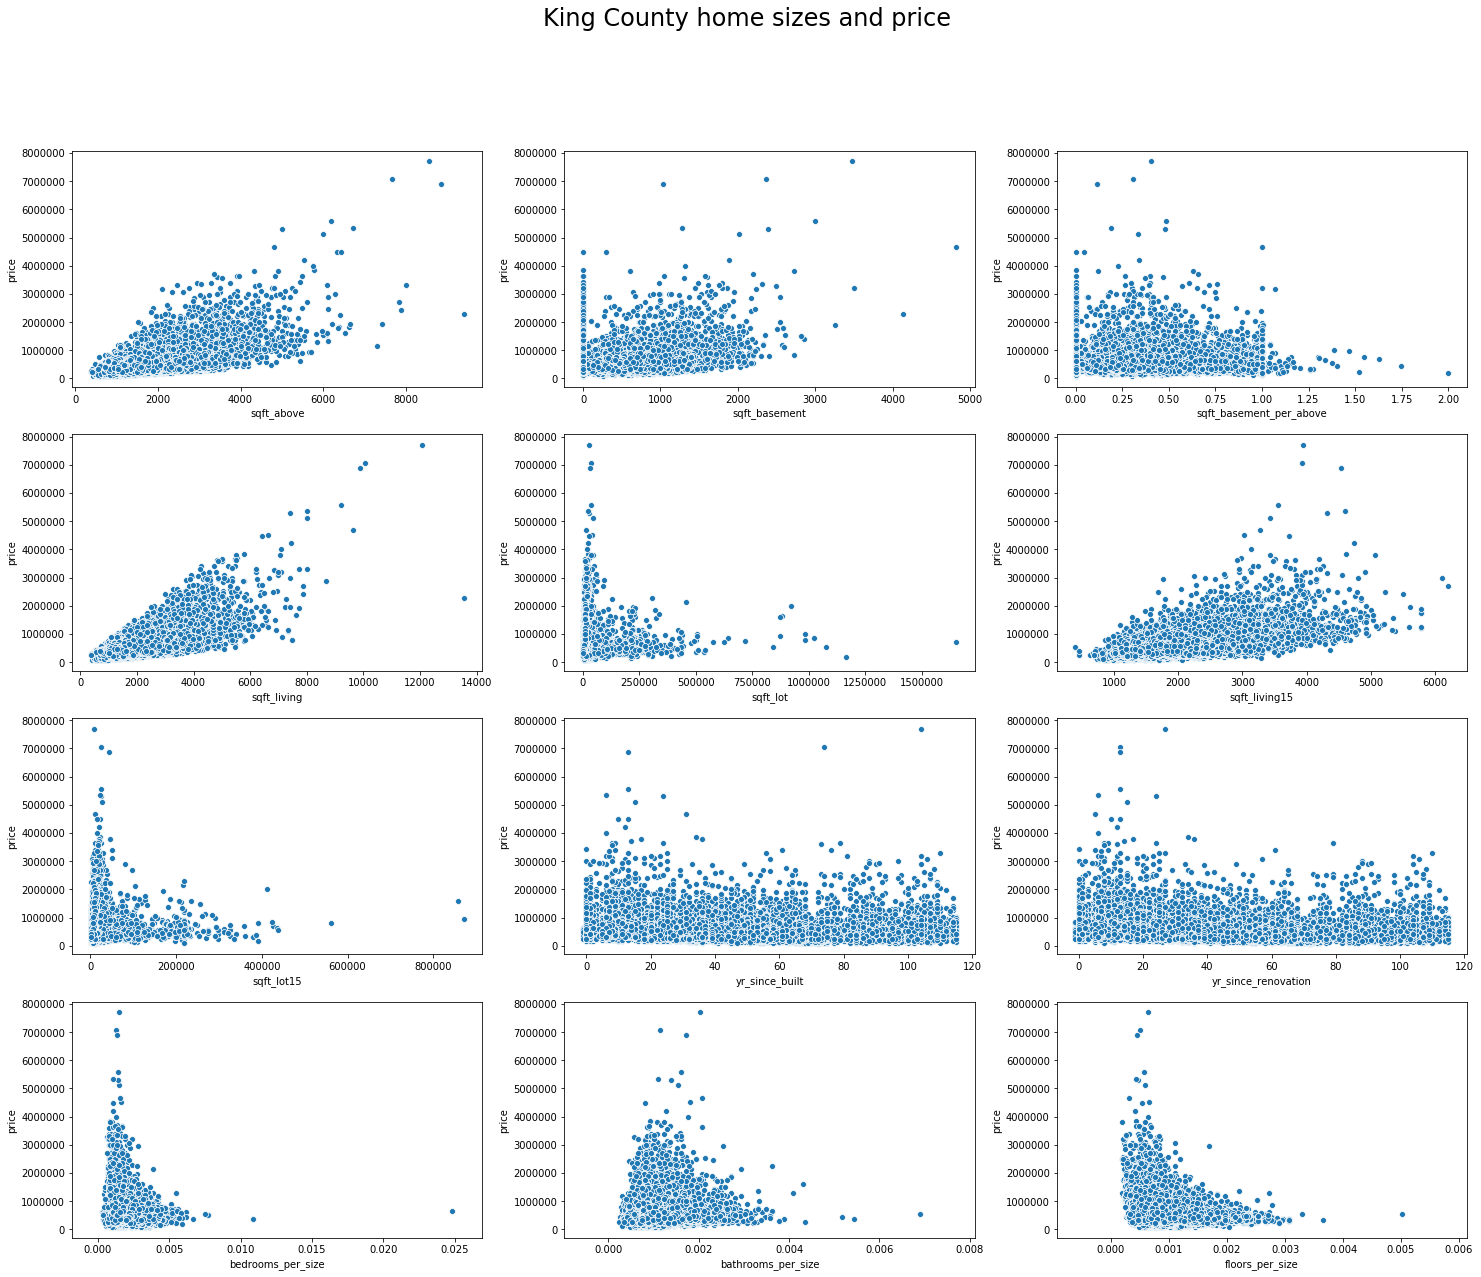

In [29]:
scatter_variables = ['sqft_above','sqft_basement','sqft_basement_per_above','sqft_living',
                     'sqft_lot','sqft_living15','sqft_lot15','yr_since_built','yr_since_renovation',
                    'bedrooms_per_size','bathrooms_per_size','floors_per_size']
f, axes = plt.subplots(4, 3, figsize = (25, 20))
f.suptitle('King County home sizes and price', fontsize = 24)
counter = 0
row = [0,0,0,1,1,1,2,2,2,3,3,3]
column = [0,1,2,0,1,2,0,1,2,0,1,2]
for feature in scatter_variables:
    sns.scatterplot(housing[feature],housing['price'],ax=axes[row[counter],column[counter]])
    counter+=1

Based on the twelve scatterplots above, we notice that 'sqft_living15', 'sqft_living', and 'sqft_above' show the highest positive linear correlation with the selling price of the house. This indicates that larger living spaces reflect higher selling prices, supporting our initial hypothesis above.

'yr_since_built' and 'yr_since_renovation' show little to no correlation with 'price', most likely because large variation exists across these features and selling price remains affected by so many additional features as well.

'sqft_lot' and 'sqft_lot15 interestingly demonstrate a slightly negative correlation with 'price', indicating that larger properties sell for lower prices. This may be influenced by huge (possibly rural?) properties with small acutal houses. 

'bedrooms_per_size' and 'floors_per_size' appear to have slight negative correlations with 'price', while 'bathrooms_per_size' seems to be positively correlated, although the shape of all three plots remain relatively undefined. These trends may indicate that buyers prefer houses more concentrated with bathrooms than bedrooms or floors. Larger houses are more favorable if they have an increased number of bathrooms, but not necessarily floors or bedrooms.

Finally, 'sqft_basement' is positively correlated while 'sqft_basement_per_above' shows negative correlation. This may mean that the presence of larger basements can increase the selling price of the home, yet the basement should not outweigh the amount of aboveground space, as houses with a smaller basement-to-aboveground ratio still present higher selling prices.

Overall, the trend seems to follow that higher square footage in houses indicate higher selling prices.

## How does zipcode and location affect selling price of a home?

Next, we will examine how the zipcode of a home affects its selling price. Based on my personal experience living and growing up in King County, wealthy pockets of homes throughout many parts of the area may show that certain zipcodes reflect much higher selling prices of homes due to location in higher-end areas. 

/Users/huntersapienza/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


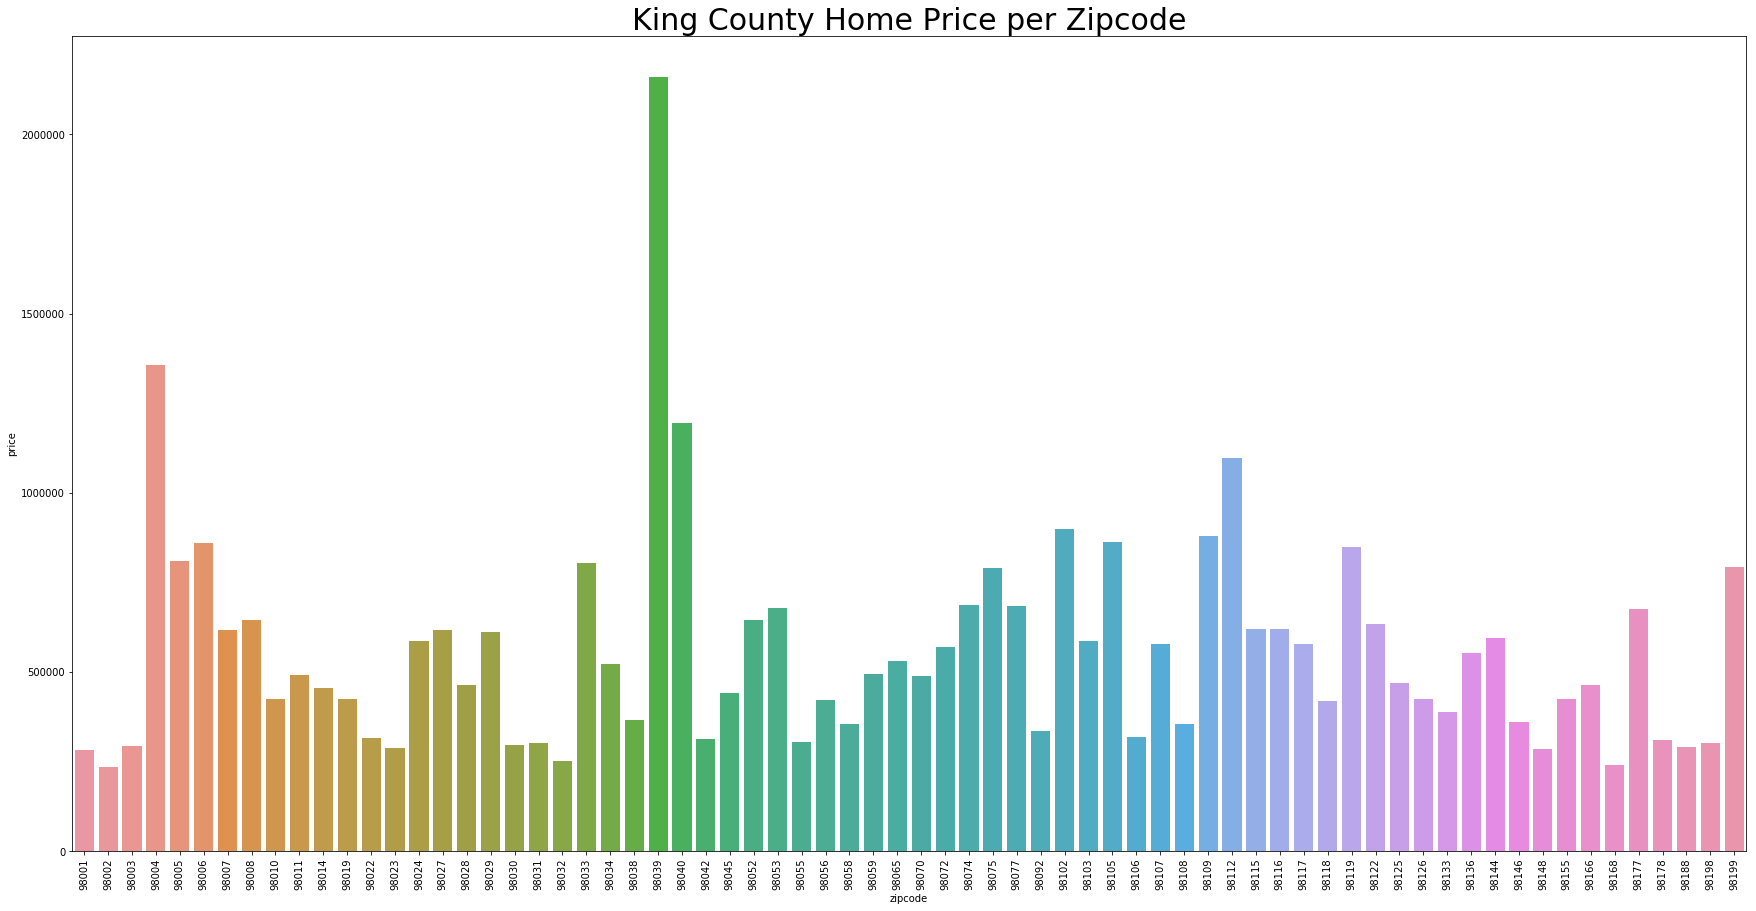

In [30]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(housing['zipcode'],housing['price'],ci=False)
plt.xticks(rotation = 90)
plt.title('King County Home Price per Zipcode',fontsize=30)
plt.show()

As predicted, some zipcodes indicate much higher selling prices than the majority, and fall well above the mean selling price, appoximately 540 thousand dollars . 98039, 98040, 98004, and 98112 maintain the highest average selling prices for homes, with all four at a mean over 1 million dollars. 98039 is the zipcode for Medina, a neighborhood within Bellevue with residents such as Bill Gates and other extremely wealthy technology and business billionaires. 98004 is located just adjacent to 98039 and contains very high-end homes as well, at a lower mean than those in Medina, however, possibly due to its location slightly inland, as opposed to Medina's waterfront homes. 98040, located within Mercer Island, is well-known for extremely high-end housing, with easy access to Seattle jobs in the city center just across Lake Washington via the I-90 bridge. 98112, encompasing the Madison Park, Montlake, and north Capital Hill neighborhoods in Seattle, is well known for it's large mansions and extraordinarly high home prices. Kurt Kobain is a notable former resident of the neighborhood, with his memorial located at a park within 98112. The zipcode, located on the west side of Lake Washington contains a large number of waterfront homes and a very desirable location within the city with easy access to jobs and city attractions.

## How do age and time affect the selling price of a house?

Although 'yr_since_renovation' and 'yr_since_built' did not indicate any noticable trends when plotted as scatterplots against 'price', we may notice some insights when instead examining these two features as well as the original variables 'yr_built' and 'yr_renovated' as line graphs. The ways in which these variables change over time may reveal interesting insights about factors affecting the selling prices of houses in King County, especially in connection with social and economic trends across the country throughout the past century.

/Users/huntersapienza/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


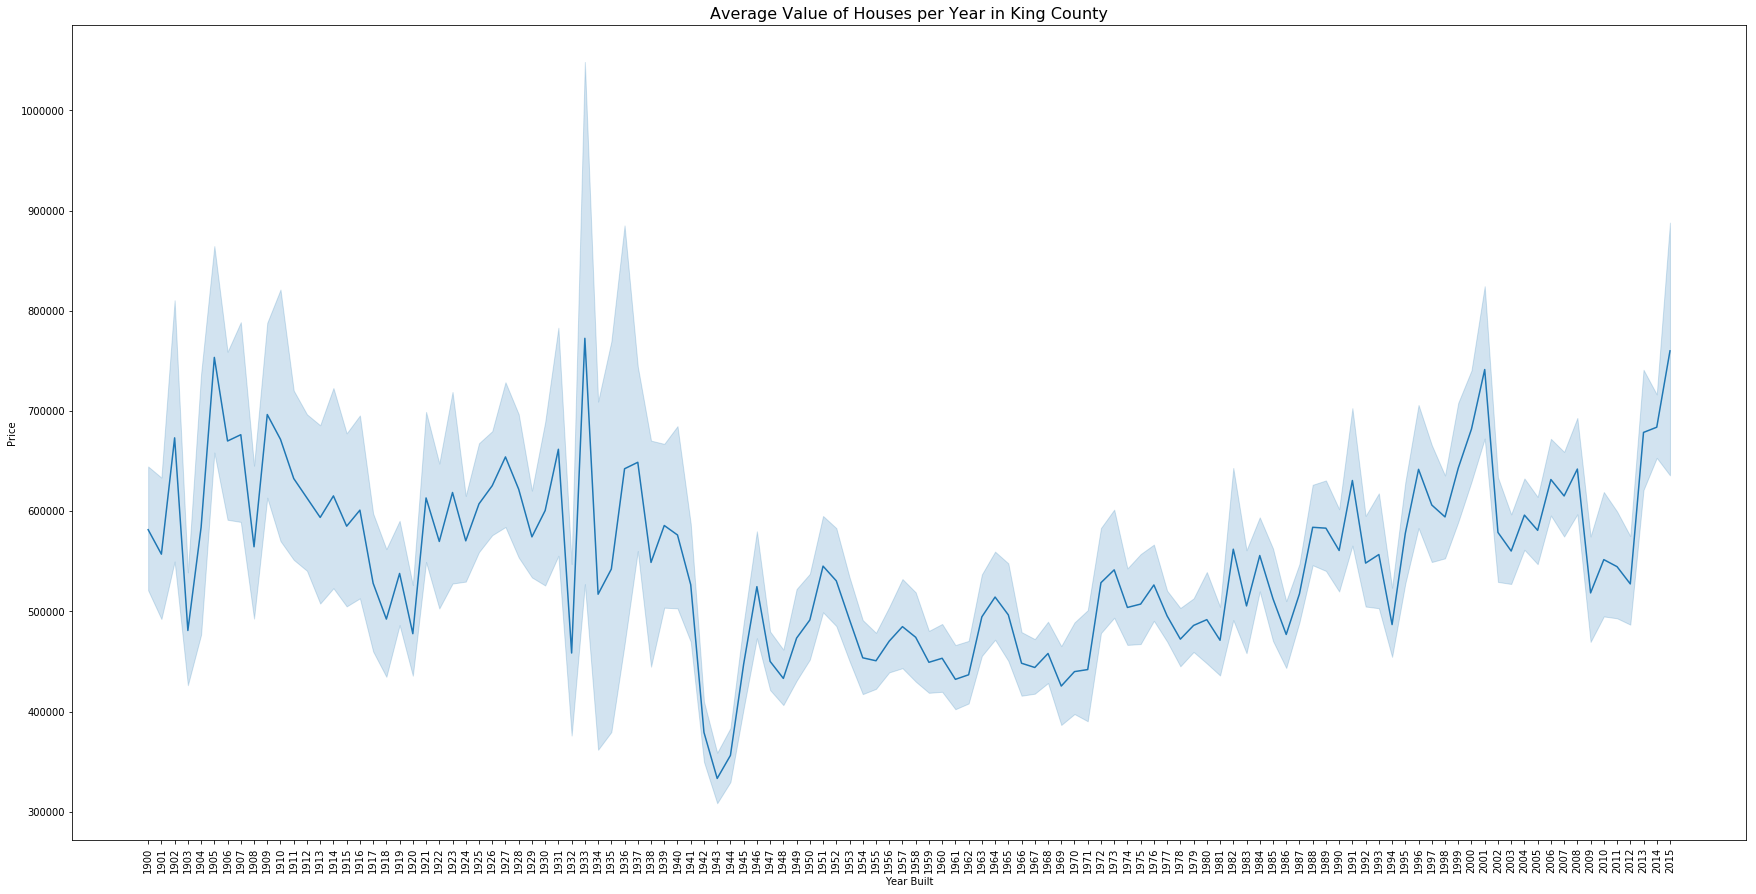

In [31]:
f, ax = plt.subplots(figsize = (30, 15))
sns.lineplot(housing['yr_built'],housing['price'])
plt.xticks(rotation=90)
plt.title('Average Value of Houses per Year in King County', size=16)
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()

While the average selling price for houses has dipped below the overall average (540 thousand dollars) several times since 1900, the first major crash occurred during the 1930s, in conjunction with the Great Depression. Housing prices did not begin to recover until 1945, during and after World War II, which provided great economic stimulation, especially along the West Coast in our efforts against Japan. The average selling price per year begin to rise fairly steadily (although with some dips) throughout the rest of the century, until it dropped once again in the early 2000s during the housing crisis that our generation is much more familiar with. While this recession was not as significant as that of the Great Depression, the average price still dipped below 540 thousand in 2009 and 2012. Most recently, housing prics have increased dramatically from those of the recession, likely due to the technology boom across the nation, and especially within Seattle. Companies such as Amazon, Microsoft, and Google influenced tremendous growth in the economy and job market wiithin Seattle, leading to increased housing costs across the entire Seattle area and all of King County.

/Users/huntersapienza/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


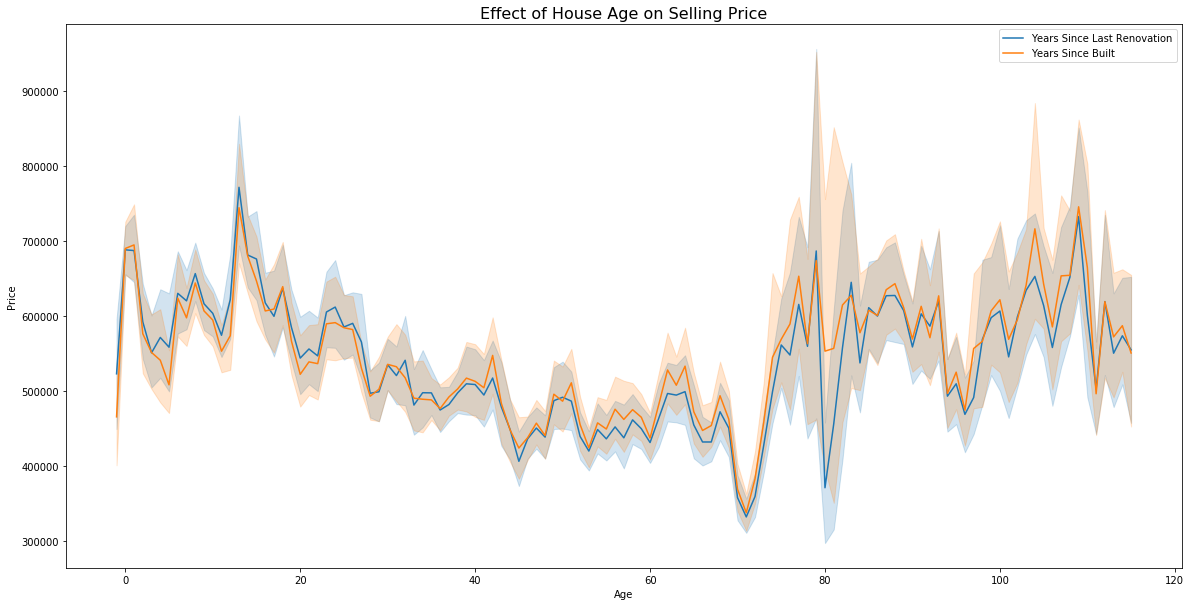

In [32]:
f, ax = plt.subplots(figsize = (20, 10))
sns.lineplot(housing['yr_since_renovation'],housing['price'],label='Years Since Last Renovation')
sns.lineplot(housing['yr_since_built'],housing['price'],label='Years Since Built')
plt.title('Effect of House Age on Selling Price',size=16)
plt.xlabel('Age')
plt.ylabel('Price')
plt.legend()
plt.show()

With graphs of the number of years since prior renovation and since originally built plotted on top of one another against house price, we can see that newer houses are certainly favored. Houses built or renovated within approximately the past 15 years have the some of the highest average prices, while this average begins to decline with houses older than this, especially more than 20 years. This trends continues with houses up to around 70 years old, with those houses at the lowest value based upon their average selling price. However, houses even older than this regain their value, as those from 80-120 years old worth nearly as much (if not just as much!) as those built and renovated within the past 15 years. It seems that while newly constructed houses may be the best bet for profit and selling at a high price, those vintage and antique-style homes should be preserved as they posssess nearly equivalent value.

## How does the ranking assigned by King County affect a house's value?

According to the King County Department of Assessments, grades are provided to houses and residential units as a "classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value" (King County, 2019). As a measure of housing quality, these grades may reflect interesting trends associated with average selling price of these houses.

/Users/huntersapienza/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


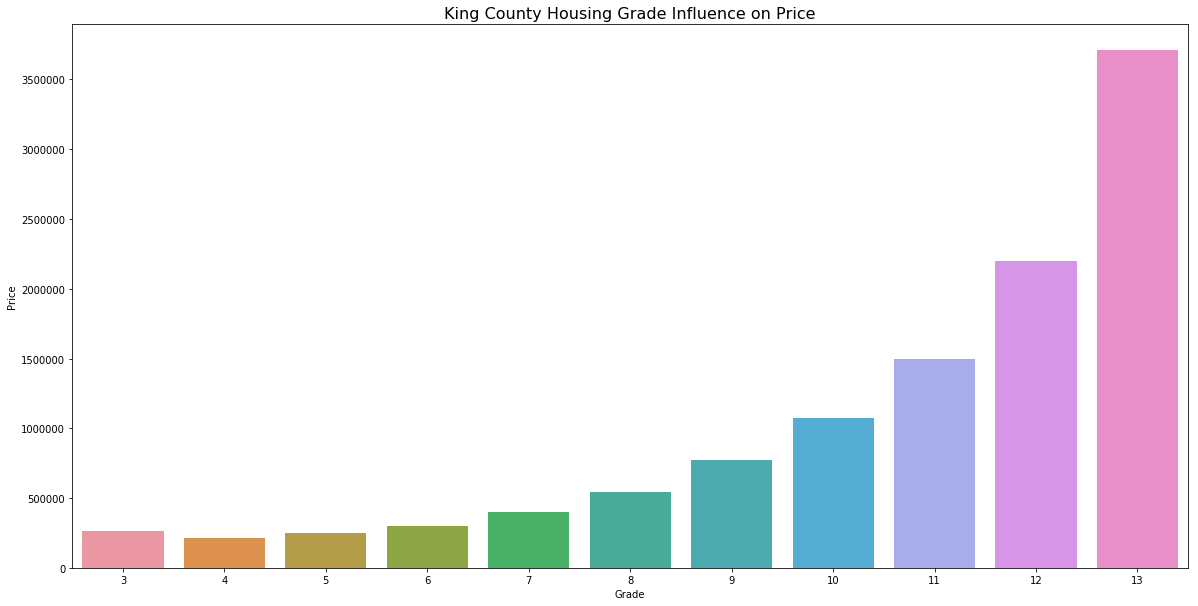

In [33]:
f, ax = plt.subplots(figsize = (20, 10))
sns.barplot(housing['grade'].astype('int64'),housing['price'],ci=False)
plt.title('King County Housing Grade Influence on Price', fontsize = 16)
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

Based upon the above bar graph, we can see that housing value increases seemingly exponentially with increasing rank. While the average selling price remains farily low and constant for houses with an assigned grade of less than 8, for those with grade 8 and higher, the average price increases dramatically, above the overall average (540 thousand dollars) after grade 9 and up to over 3.5 million dollars for houses with a grade of 13. It appears that grade significantly impacts the selling price of a home and should be weighed heavily by both buyers and sellers.

As the error message for the above code indicates, python assumes that by graphing 'grade' against 'price', we mean to graph the average selling price for each grade. The three cells of code below verify that our resulting graph provides the same results as if we group grade, average the price per grade, and then graph the new columns. A second, identical graph is provided below, without error message, and confirms our results above. We make the same assumptions without this additional code for the graphs of 'view' and 'condition' below as well.

In [34]:
to_add = ['price','grade']
z = pd.DataFrame(housing[to_add])
z.head()

,price,grade
0,221900.0,7
1,538000.0,7
2,180000.0,6
3,604000.0,7
4,510000.0,8


In [35]:
graph_z=z.groupby(['grade'],as_index=False).mean()
graph_z

,grade,price
0,10,1.072347e+06
1,11,1.497792e+06
2,12,2.202528e+06
3,13,3.710769e+06
4,3,2.620000e+05
5,4,2.120019e+05
6,5,2.485240e+05
7,6,3.019166e+05
8,7,4.025946e+05
9,8,5.429868e+05


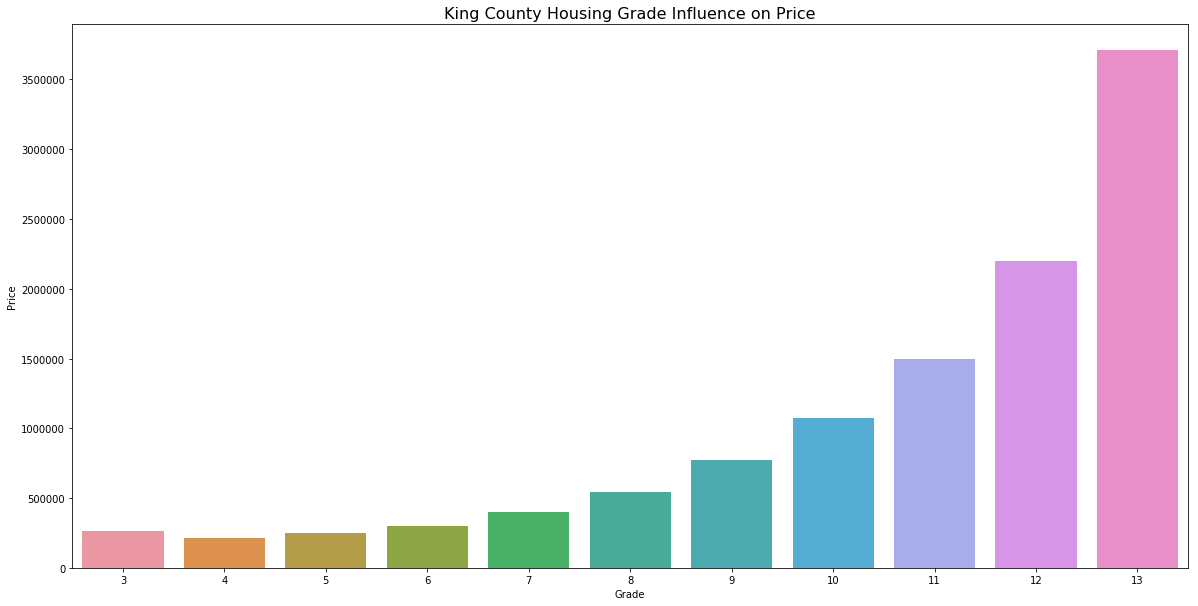

In [36]:
f, ax = plt.subplots(figsize = (20, 10))
sns.barplot(graph_z['grade'].astype('int64'),graph_z['price'],ci=False)
plt.title('King County Housing Grade Influence on Price', fontsize = 16)
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

## How does the number of views a house receives affect its value?

The graph below illustrates the relationship between the number of times a house has been viewed and its final selling price. It appears that a positive correlation between this feature and our target variable with houses receiving more views boasting a higher average selling price. This may be because houses that are more desirable (based upon a varitey of factors) are more likely to receive a high number of views, thus increasing its value. On the other hand, houses that are a difficult sell may recieve few, if only one, view before selling, resulting in a lower and more negotiated final price.

/Users/huntersapienza/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


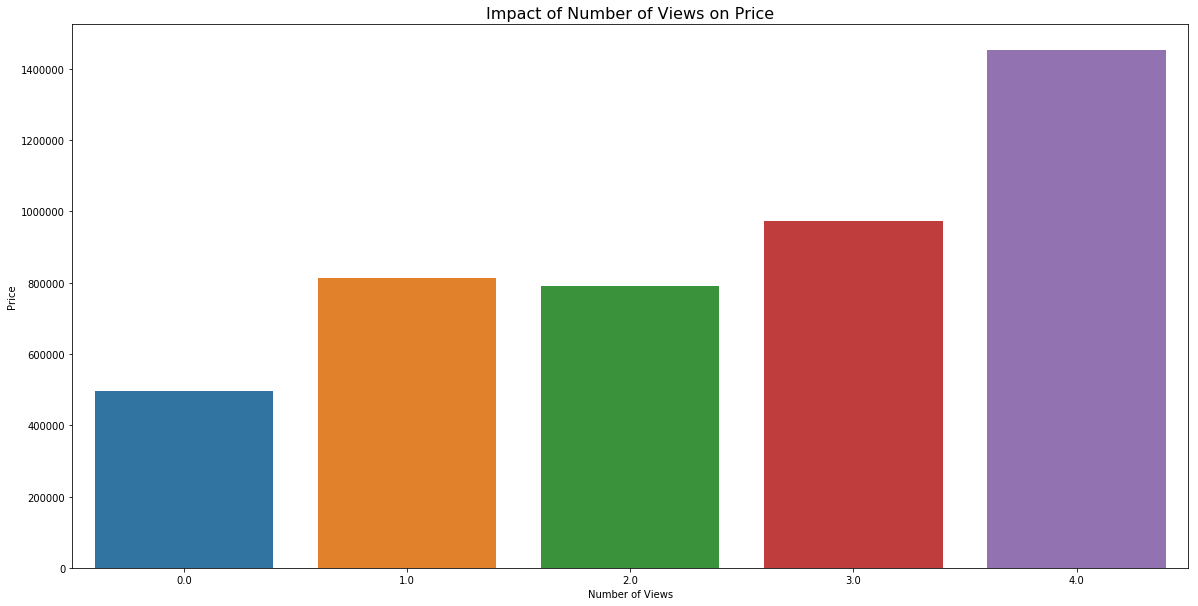

In [37]:
f, ax = plt.subplots(figsize = (20, 10))
sns.barplot(housing['view'],housing['price'],ci=False)
plt.title('Impact of Number of Views on Price', fontsize = 16)
plt.xlabel('Number of Views')
plt.ylabel('Price')
plt.show()

## How does the condition rating of a house impact its selling price?

The condition rating of a house indicates how good the overall condition and quality are, and may affect its selling price. Below, this feature is graphed against the average selling price for each grade. As indicated by the graph, condition rankings of 1 or 2 seem to negatively affect the house price, with the average for these rankings falling well below the overall average of 540 thousand dollars. Houses with condition rankings of 5 have the highest average selling price, at approximately 600 thousand. However, little to no significant differentiation exists between houses with conditions rankings of 3 or higher. Houses with any of these three rankings have similar average selling prices.

/Users/huntersapienza/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


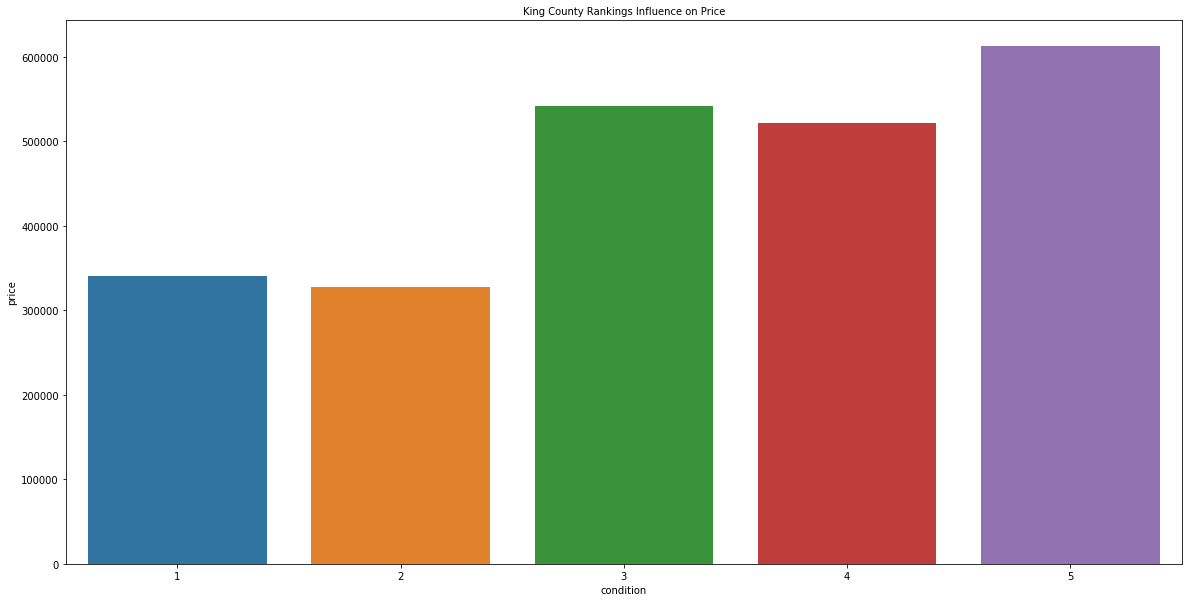

In [38]:
f, ax = plt.subplots(figsize = (20, 10))
sns.barplot(housing['condition'],housing['price'],ci=False)
plt.title('King County Rankings Influence on Price', fontsize = 10)
plt.show()

# Modeling the Data

## Multicollinearity

Before beginning the modeling process for our data, we must check for issues involving multicollinearity. If features indicate high correlation with each other, it will produce issues with multilinear regression modeling for price, and it may be difficult to accurately interpret a given variable's impact on the target. To determine whether multicollinearity exists, we create a heatmap below to visualize feature correlation with each other.

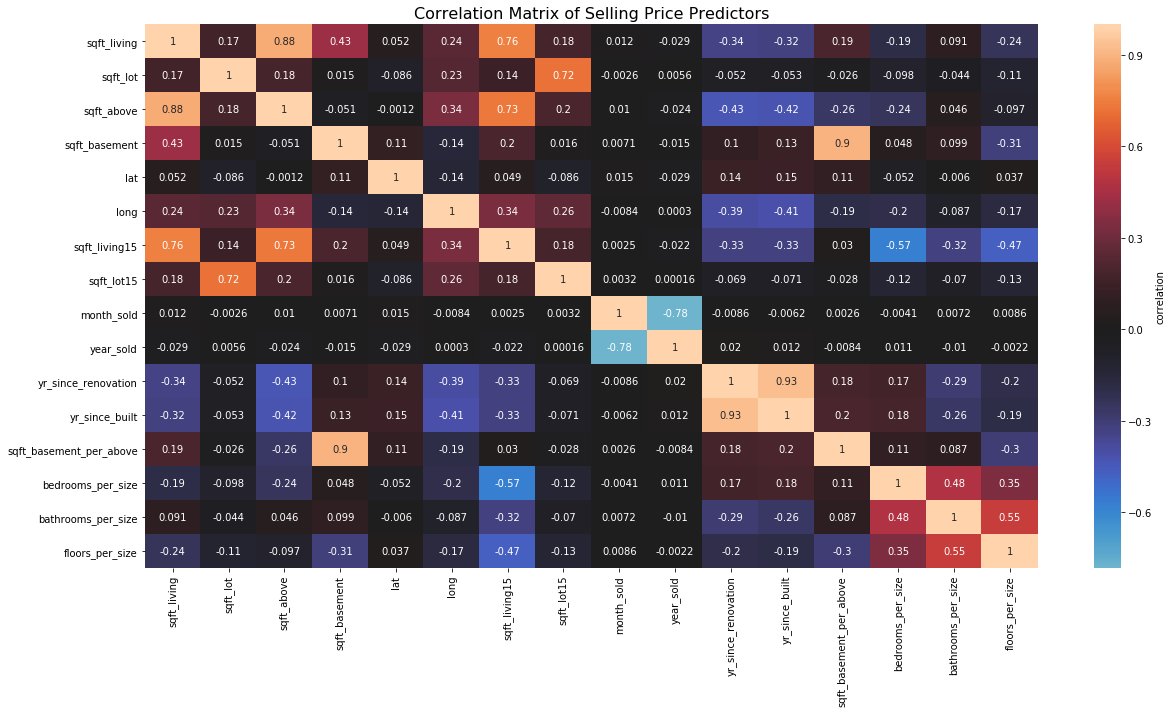

In [39]:
# drop target variable
data_pred = housing.drop('price', axis = 1)

# create correlation heatmap to visualize multicollinearity
plt.figure(figsize = (20, 10))
sns.heatmap(data_pred.corr(), center=0, annot = True,
            cbar_kws = {'label' : 'correlation'})
plt.title('Correlation Matrix of Selling Price Predictors', fontsize = 16)
plt.show()

Based upon a threshold of 0.75 for collinearity of features, we will drop the following features: 'sqft_living', 'yr_since_built', 'yr_since_renovation', 'sqft_basement_per_above', 'year_sold', and 'month_sold.

The covariance matrix below provides another method for visualizing our features and possible multicollinearity. This visualization provides similar results to the heatmap above. Thus, no additional variables must be excluded.

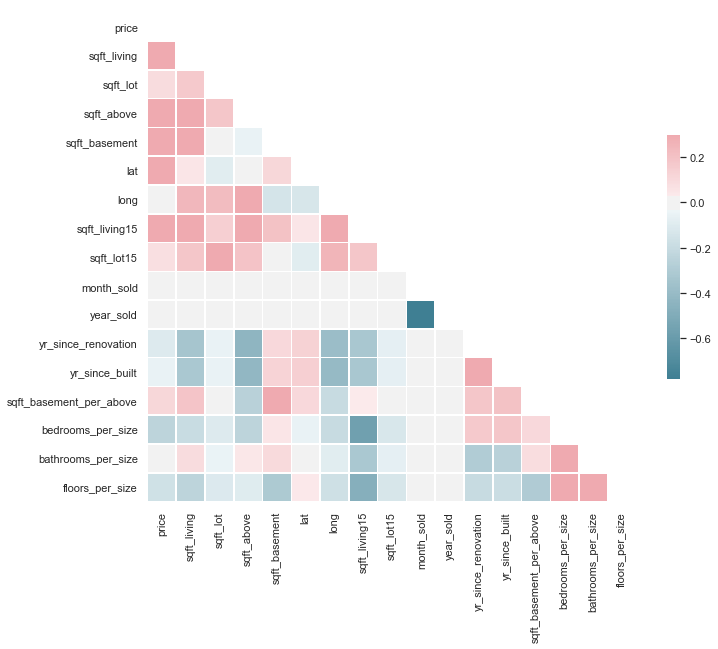

In [40]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = housing.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Reminder to drop 'yr_built' and 'yr_renovated' when modeling the data.

In [95]:
to_drop = ['price','yr_since_built','yr_since_renovation','sqft_living', 'sqft_basement_per_above',
           'yr_built','yr_renovated', 'year_sold', 'month_sold']
X = housing.drop(to_drop,axis=1)
y = pd.DataFrame(housing['price'])

In [96]:
X.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_per_size,bathrooms_per_size,floors_per_size
0,3,1.0,5650,1.0,0.0,0.0,3,7,1180,0.0,98178,47.5112,-122.257,1340,5650,0.002239,0.000746,0.000746
1,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400.0,98125,47.7210,-122.319,1690,7639,0.001775,0.001331,0.001183
2,2,1.0,10000,1.0,0.0,0.0,3,6,770,0.0,98028,47.7379,-122.233,2720,8062,0.000735,0.000368,0.000368
3,4,3.0,5000,1.0,0.0,0.0,5,7,1050,910.0,98136,47.5208,-122.393,1360,5000,0.002941,0.002206,0.000735
4,3,2.0,8080,1.0,0.0,0.0,3,8,1680,0.0,98074,47.6168,-122.045,1800,7503,0.001667,0.001111,0.000556


In [97]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
bedrooms              21597 non-null object
bathrooms             21597 non-null object
sqft_lot              21597 non-null int64
floors                21597 non-null object
waterfront            21597 non-null object
view                  21597 non-null object
condition             21597 non-null object
grade                 21597 non-null object
sqft_above            21597 non-null int64
sqft_basement         21597 non-null float64
zipcode               21597 non-null object
lat                   21597 non-null float64
long                  21597 non-null float64
sqft_living15         21597 non-null int64
sqft_lot15            21597 non-null int64
bedrooms_per_size     21597 non-null float64
bathrooms_per_size    21597 non-null float64
floors_per_size       21597 non-null float64
dtypes: float64(6), int64(4), object(8)
memory usage: 3.0+ MB


In the cells above, we create a copy of our 'housing' dataframe named 'X' and drop the appropriate features based on the results of our multicollinearity analysis. We verify that the remaining features are not highly correlated before proceeding with variable transformations.

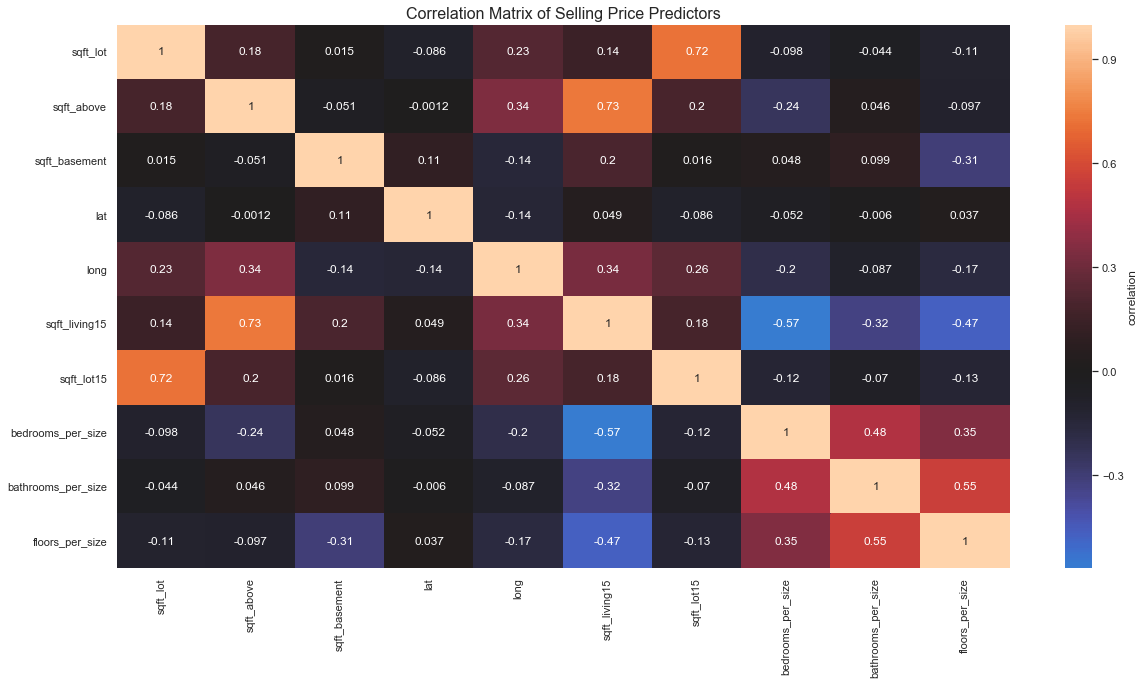

In [98]:
# create correlation heatmap to visualize multicollinearity
plt.figure(figsize = (20, 10))
sns.heatmap(X.corr(), center=0, annot = True,
            cbar_kws = {'label' : 'correlation'})
plt.title('Correlation Matrix of Selling Price Predictors', fontsize = 16)
plt.show()

Below, we create a new dataframe from the target variable, 'price', to use within our models.

In [99]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


## Standarization and log-transformations

Before proceeding with transformations, let's plot all the continuous features from 'X' as histograms to evaluate their scales and distributions.

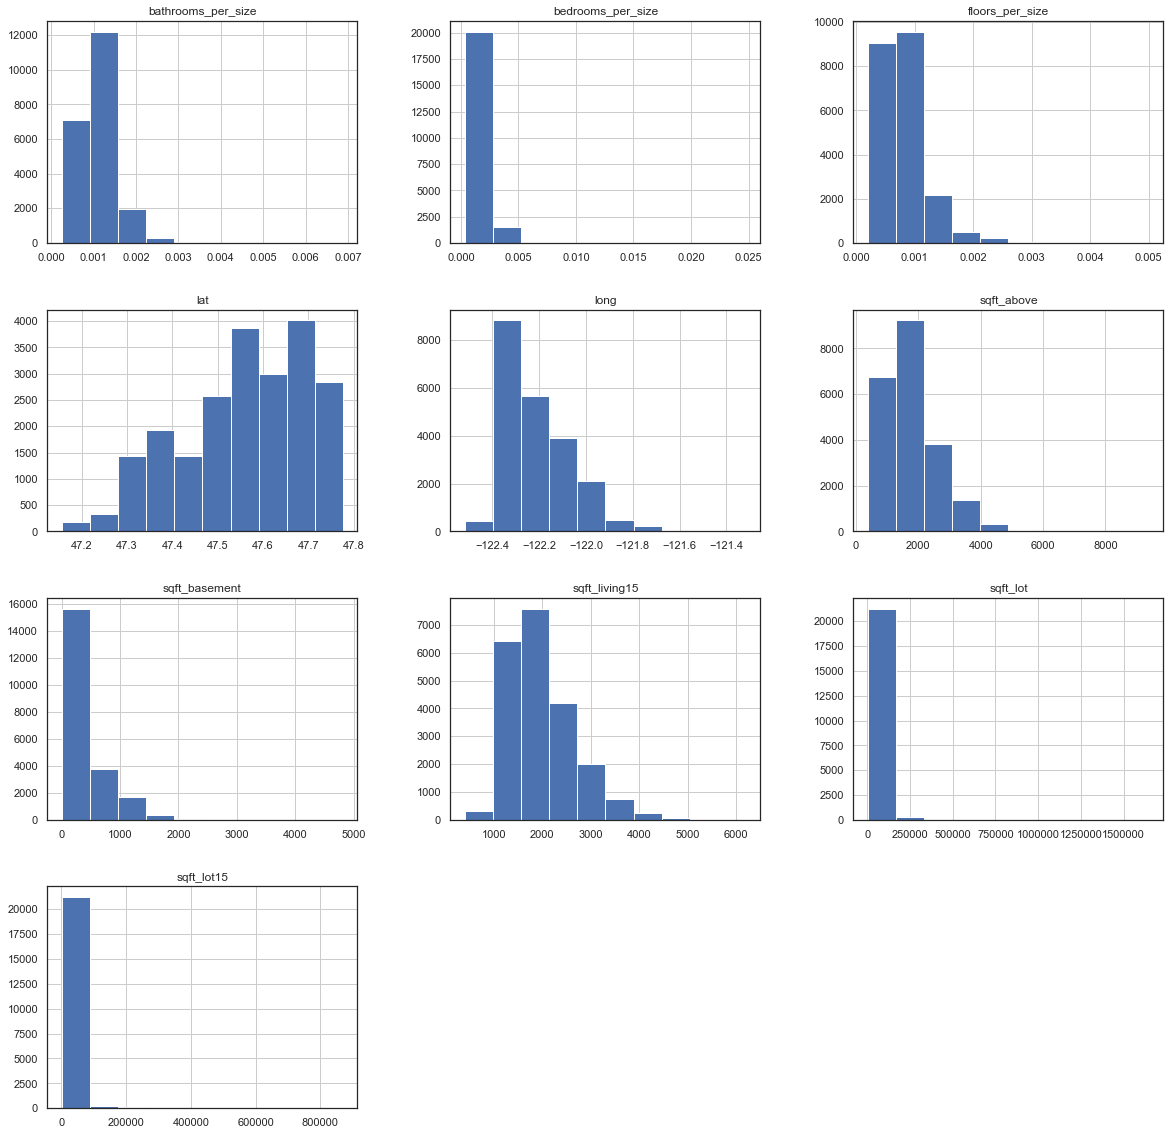

In [100]:
X.hist(figsize=(20,20));

All the variables need to be log-transformed due to a non-normal distribution, as indicated by the histograms above. Following the log-transformations, we will standardize all the continuous variables so that they are comparable and evenly weighted in our model.

In [101]:
X['long'] = X['long']*(-1)
X.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,bedrooms_per_size,bathrooms_per_size,floors_per_size
0,3,1.0,5650,1.0,0.0,0.0,3,7,1180,0.0,98178,47.5112,122.257,1340,5650,0.002239,0.000746,0.000746
1,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400.0,98125,47.7210,122.319,1690,7639,0.001775,0.001331,0.001183
2,2,1.0,10000,1.0,0.0,0.0,3,6,770,0.0,98028,47.7379,122.233,2720,8062,0.000735,0.000368,0.000368
3,4,3.0,5000,1.0,0.0,0.0,5,7,1050,910.0,98136,47.5208,122.393,1360,5000,0.002941,0.002206,0.000735
4,3,2.0,8080,1.0,0.0,0.0,3,8,1680,0.0,98074,47.6168,122.045,1800,7503,0.001667,0.001111,0.000556


In [102]:
log_transform = ['sqft_lot','sqft_living15','sqft_lot','sqft_above','lat','long',
                 'sqft_lot15','bedrooms_per_size','bathrooms_per_size','floors_per_size']

In [103]:
for column in log_transform:
    X[column] = np.log(X[column])
X.describe()

,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,bedrooms_per_size,bathrooms_per_size,floors_per_size
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,2.191243,7.395148,285.737602,3.861990,4.805773,7.539494,8.960758,-6.361675,-6.861871,-7.201019
std,0.097842,0.427140,439.806196,0.002915,0.001152,0.327467,0.812613,0.329351,0.338582,0.402501
min,1.833194,5.913503,0.000000,3.853459,4.798390,5.988961,6.478510,-8.055158,-8.320367,-8.560253
25%,2.143022,7.081709,0.000000,3.860121,4.805045,7.306531,8.536996,-6.574611,-7.081709,-7.473069
50%,2.190342,7.352441,0.000000,3.862240,4.805913,7.517521,8.938532,-6.354718,-6.861711,-7.224996
75%,2.227495,7.700748,550.000000,3.864470,4.806706,7.766417,9.218606,-6.145615,-6.642052,-6.953366
max,2.661455,9.149528,4820.000000,3.866557,4.808266,8.733916,13.677627,-3.696427,-4.977361,-5.295814


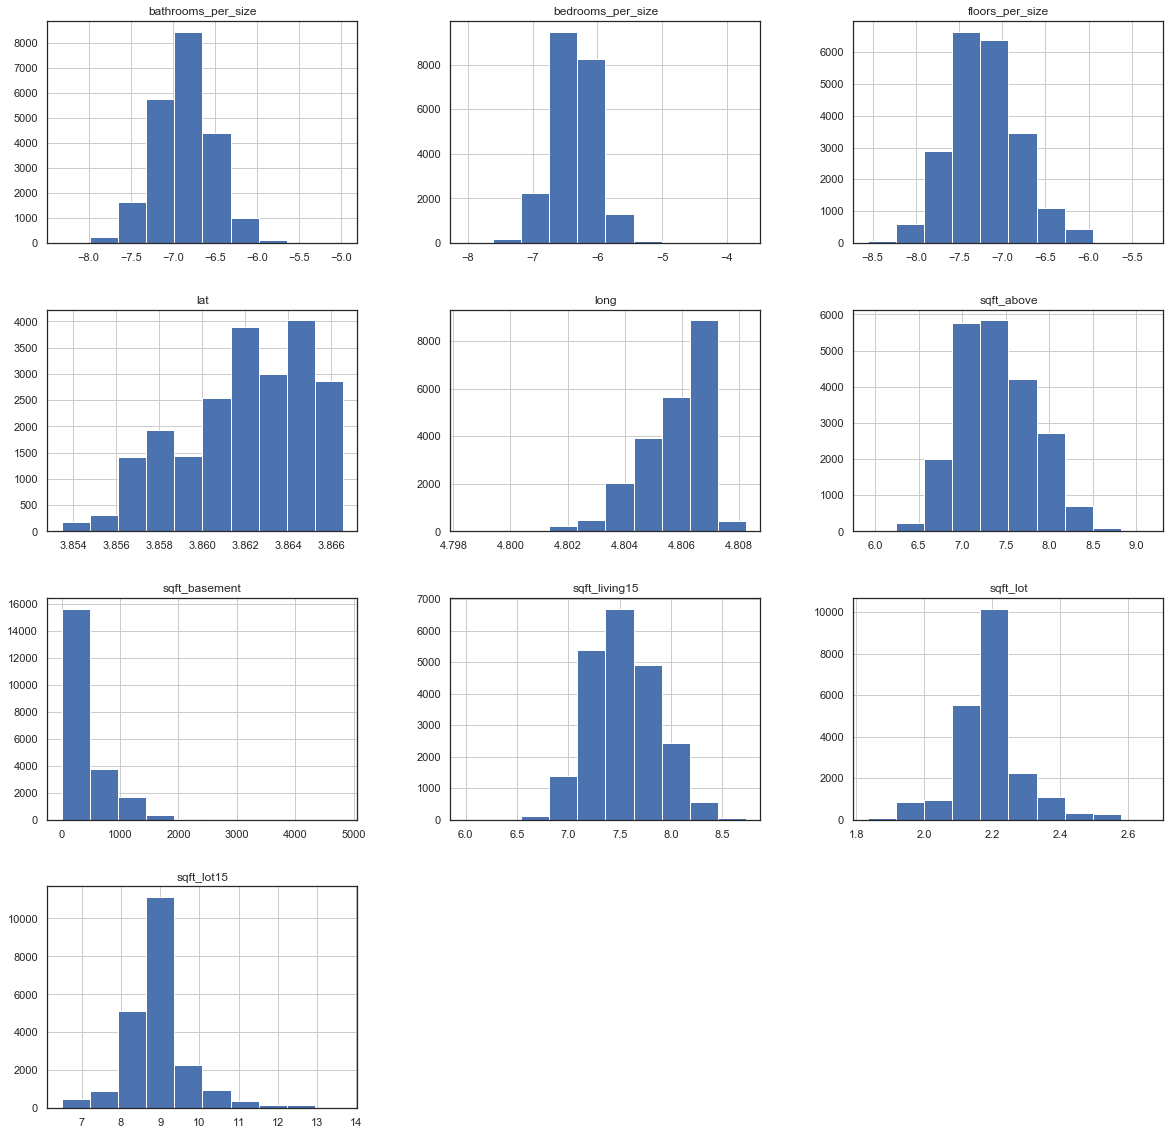

In [104]:
X.hist(figsize=(20,20));

After log-transforming all our continuous variables, we will standardize them around a mean of 0 with standard deviations of 1. 

In [105]:
for column in X.describe().columns:
    X[column] = (X[column]-np.mean(X[column]))/(np.sqrt(np.var(X[column])))
X.describe()

,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,bedrooms_per_size,bathrooms_per_size,floors_per_size
count,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04
mean,4.334486e-13,2.426243e-13,-5.862895e-16,-4.622017e-12,5.871440e-11,3.879828e-13,-5.672399e-14,-1.823480e-14,-2.566243e-13,1.131212e-13
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-3.659540e+00,-3.468834e+00,-6.497048e-01,-2.926255e+00,-6.408194e+00,-4.735034e+00,-3.054723e+00,-5.142006e+00,-4.307760e+00,-3.377051e+00
25%,-4.928524e-01,-7.338258e-01,-6.497048e-01,-6.410090e-01,-6.316671e-01,-7.114236e-01,-5.214935e-01,-6.465486e-01,-6.493039e-01,-6.759160e-01
50%,-9.204472e-03,-9.998551e-02,-6.497048e-01,8.588365e-02,1.214370e-01,-6.710155e-02,-2.735255e-02,2.112336e-02,4.719953e-04,-5.957267e-02
75%,3.705258e-01,7.154718e-01,6.008749e-01,8.508123e-01,8.100262e-01,6.929801e-01,3.173147e-01,6.560318e-01,6.492495e-01,6.152997e-01
max,4.805946e+00,4.107364e+00,1.030992e+01,1.566656e+00,2.164313e+00,3.647541e+00,5.804707e+00,8.092623e+00,5.566022e+00,4.733528e+00


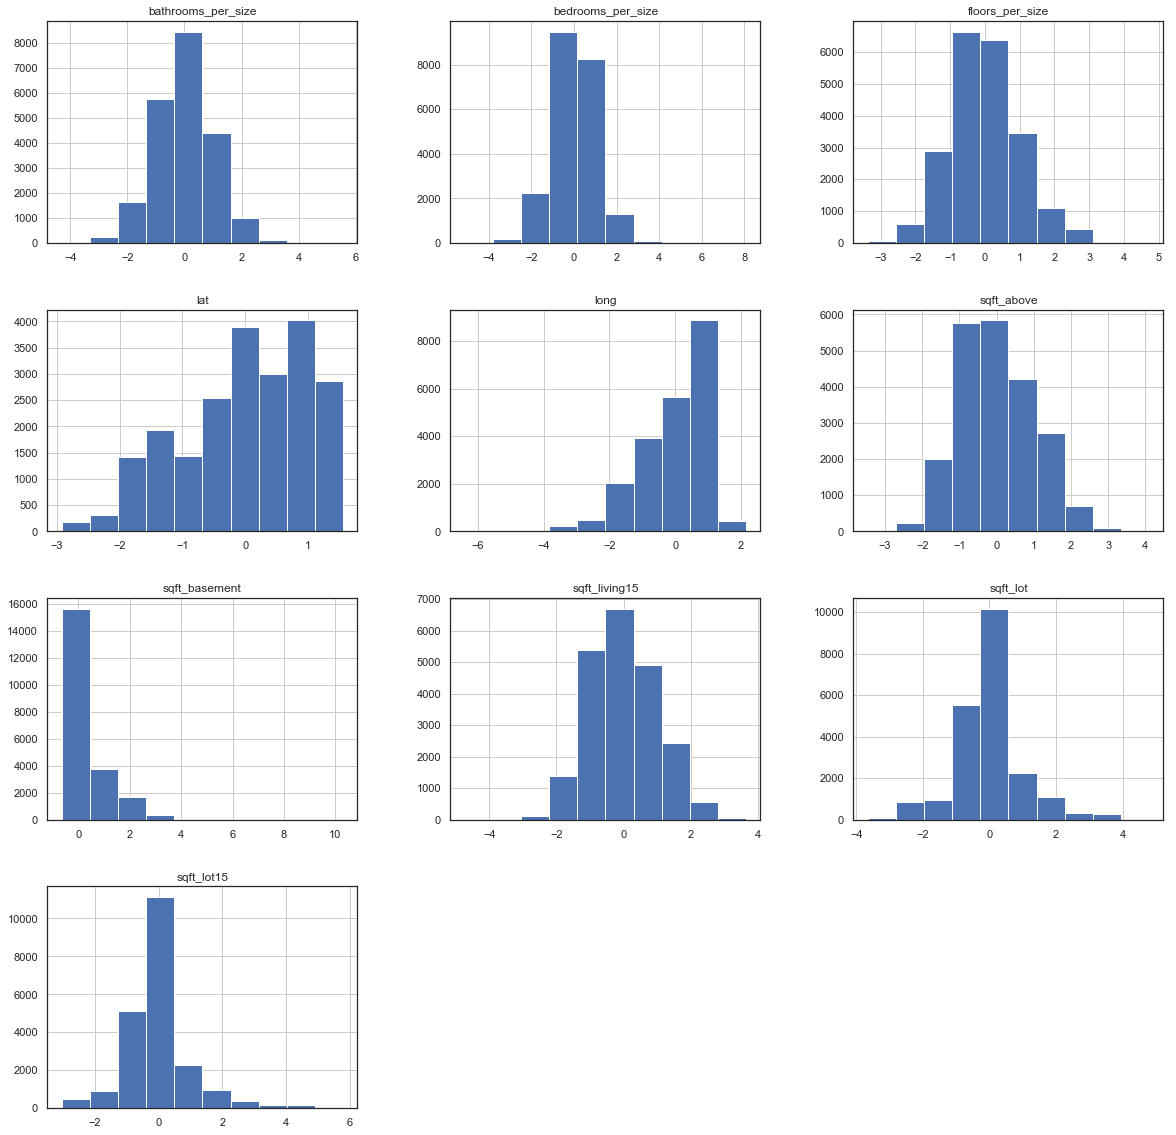

In [106]:
X.hist(figsize=(20,20));

Based upon the historgrams above, we can see that our continuous variables are distributed more closely to normal due to our log-transformations. By standardizing these features, it allows us to more evenly weight their impact on the target variable as we proceed with modeling.

## One-Hot Coding

Next, we will one-hot code our categorical features by creating dummies for each.

In [107]:
X = pd.get_dummies(X)
X.head()

,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,bedrooms_per_size,bathrooms_per_size,floors_per_size,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-0.356789,-0.753583,-0.649705,-0.351367,0.306061,-1.035453,-0.395459,0.789032,-0.999940,0.001475,...,0,0,0,0,0,0,1,0,0,0
1,-0.067248,0.672709,0.259808,1.160045,0.746159,-0.326789,-0.024288,0.084420,0.709793,1.147060,...,0,0,0,0,0,0,0,0,0,0
2,0.297264,-1.752995,-0.649705,1.281504,0.135640,1.126531,0.042037,-2.591722,-3.090952,-1.757475,...,0,0,0,0,0,0,0,0,0,0
3,-0.502410,-1.026858,1.419436,-0.282062,1.271146,-0.990210,-0.545863,1.617551,2.201124,-0.035333,...,0,0,0,0,0,0,0,0,0,0
4,0.057901,0.073516,-0.649705,0.410214,-1.200480,-0.134221,-0.046395,-0.107047,0.175667,-0.731750,...,0,0,0,0,0,0,0,0,0,0


## Creating a Model

Now (finally!), we can begin modeling our data using multilinear regression based upon our remaining features impact on and correlation with our target variable, 'price'.

**First Model:** To create our initial model from the features in 'X' with target variable 'price' in 'y', we will import the required methods and programs. Using a train-test split with a test group comprised of 20% of the data, we run an initial linear model based on the training data.

In [108]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [110]:
X_int = sm.add_constant(X_train)
first_model = sm.OLS(y_train, X_int.astype(float)).fit()
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     626.1
Date:                Wed, 16 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:07:32   Log-Likelihood:            -2.3019e+05
No. Observations:               17277   AIC:                         4.607e+05
Df Residuals:                   17138   BIC:                         4.617e+05
Df Model:                         138                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.271e+16   1.09e+17     -0.116      0.907   -2.27e+17    2.02e+17
sqft_lot             3.71e+04   3128.251     11.859      0.000     3.1e+04    4.32e+04
sqft_above          1.031e+05   2791.238     36.950      0.000    9.77e+04    1.09e+05
sqft_basement       4.194e+04   1622.286     25.852      0.000    3.88e+04    4.51e+04
lat                  3.24e+04   9079.527      3.568      0.000    1.46e+04    5.02e+04
long                2.691e+04   6635.062      4.055      0.000    1.39e+04    3.99e+04
sqft_living15      -3.175e+15   2.73e+16     -0.116      0.907   -5.67e+16    5.03e+16
sqft_lot15         -1.441e+04   3000.828     -4.801      0.000   -2.03e+04   -8525.472
bedrooms_per_size  -3.822e+14   3.29e+15     -0.116      0.907   -6.83e+15    6.06e+15
bathrooms_per_size -1.644e+14   1.41e+15     -0.116      0.907   -2.94e+15    2.61e+15
floors_per_size     -3.24e+15   2.79e+16     -0.116      0.907   -5.79e+16    5.14e+16
bedrooms_1         -3.871e+15   3.33e+16     -0.116      0.907   -6.91e+16    6.14e+16
bedrooms_10        -1.198e+15   1.03e+16     -0.116      0.907   -2.14e+16     1.9e+16
bedrooms_11        -1.088e+15   9.36e+15     -0.116      0.907   -1.94e+16    1.73e+16
bedrooms_2         -3.066e+15   2.64e+16     -0.116      0.907   -5.48e+16    4.86e+16
bedrooms_3         -2.596e+15   2.23e+16     -0.116      0.907   -4.64e+16    4.12e+16
bedrooms_33         1.871e+14   1.61e+15      0.116      0.907   -2.97e+15    3.34e+15
bedrooms_4         -2.262e+15   1.95e+16     -0.116      0.907   -4.04e+16    3.59e+16
bedrooms_5         -2.003e+15   1.72e+16     -0.116      0.907   -3.58e+16    3.18e+16
bedrooms_6         -1.791e+15   1.54e+16     -0.116      0.907    -3.2e+16    2.84e+16
bedrooms_7         -1.612e+15   1.39e+16     -0.116      0.907   -2.88e+16    2.56e+16
bedrooms_8         -1.457e+15   1.25e+16     -0.116      0.907    -2.6e+16    2.31e+16
bedrooms_9         -1.321e+15   1.14e+16     -0.116      0.907   -2.36e+16    2.09e+16
bathrooms_0.5      -1.725e+15   1.48e+16     -0.116      0.907   -3.08e+16    2.74e+16
bathrooms_0.75     -1.528e+15   1.31e+16     -0.116      0.907   -2.73e+16    2.42e+16
bathrooms_1.0      -1.388e+15   1.19e+16     -0.116      0.907   -2.48e+16     2.2e+16
bathrooms_1.25      -1.28e+15    1.1e+16     -0.116      0.907   -2.29e+16    2.03e+16
bathrooms_1.5      -1.191e+15   1.02e+16     -0.116      0.907   -2.13e+16    1.89e+16
bathrooms_1.75     -1.116e+15    9.6e+15     -0.116      0.907   -1.99e+16    1.77e+16
bathrooms_2.0      -1.052e+15   9.05e+15     -0.116      0.907   -1.88e+16    1.67e+16
bathrooms_2.25     -9.945e+14   8.55e+15     -0.116      0.907   -1.78e+16    1.58e+16
bathrooms_2.5      -9.433e+14   8.11e+15     -0.116      0.907   -1.68e+16     1.5e+16
bathrooms_2.75     -8.971e+14   7.72e+

From the OLS regression, we see that the R-squared and adjusted-R-squared values are comparable and both fairly high, indicating high correlation between the features and our target variable, 'price'. The F-statistic is high and the probability of this value is extremely low, leading us to believe that the correlation between our predictors and the target variable may be significant. However, the p-value for the constant as well as some of the predictors is greater than 0.05, indicating that issues still exist. For our first model, we did not log-transform or standardize our target variable, but will test this for our second model to see if any improvement occurs. 

Before proceeding, let's also test our MSE for both the train and test data to evaluate how well our model can be applied to other data.

In [111]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [112]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [113]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    2.189743e+10
dtype: float64
Test Mean Squarred Error: price    7.964608e+26
dtype: float64


Both our mean squared errors are extraordinarily high, meaning that the changes specified above may be necessary and we certainly need to remodel in order to find a better fit.

**Second Model:** For our second model, we start by plotting a histogram of our target variable, 'price' to evaluate whether we should also apply transformations to this variable before remodeling.

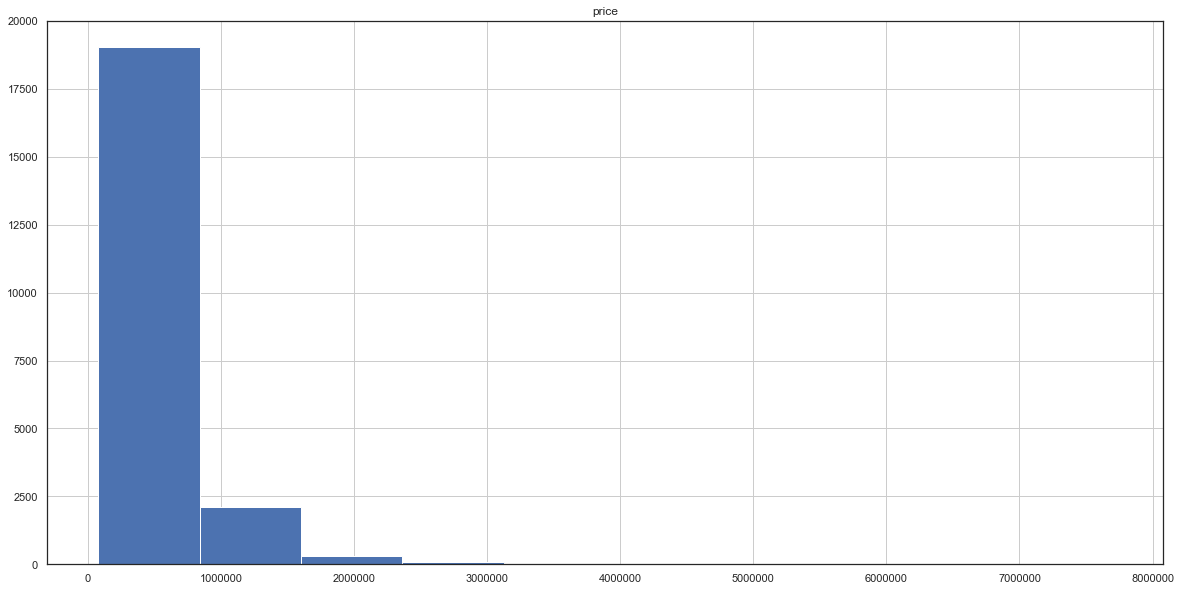

In [114]:
y.hist(figsize=(20,10));

This histogram is clearly not normally distributed. Thus, we will log-transform and standardize this data so that it is more comparable to our predictors, hopefully resulting in a more sound model.

In [115]:
y['price'] = np.log(y['price'])
y.head()

,price
0,12.309982
1,13.195614
2,12.100712
3,13.311329
4,13.142166


In [116]:
y['price'] = (y['price']-np.mean(y['price']))/(np.sqrt(np.var(y['price'])))

In [117]:
y.head()

,price
0,-1.402030
1,0.279945
2,-1.799472
3,0.499710
4,0.178438


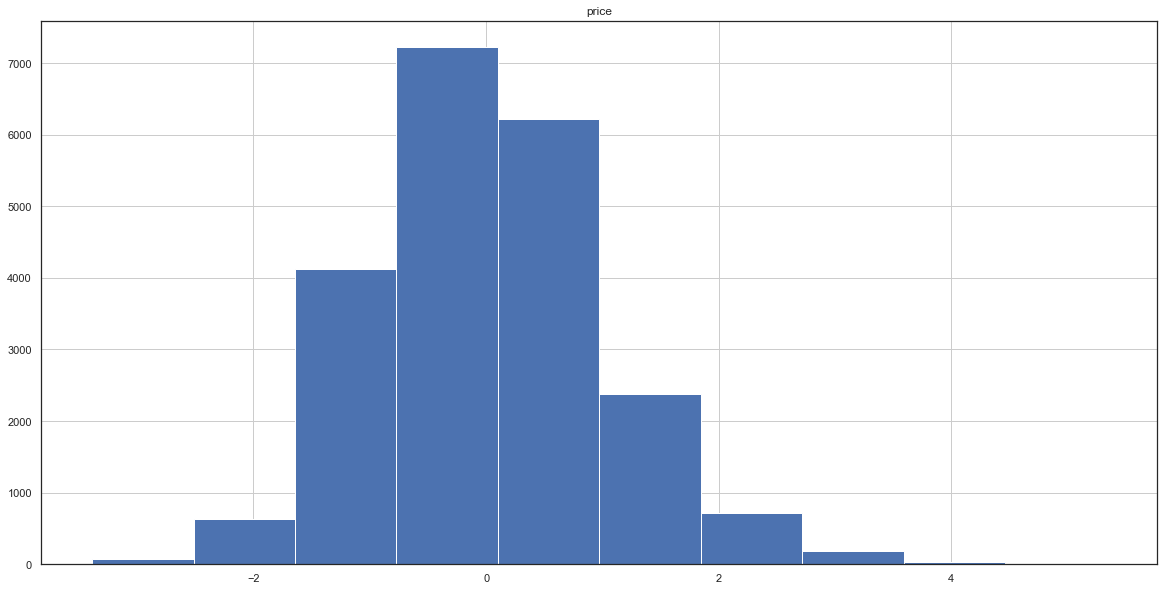

In [118]:
y.hist(figsize=(20,10));

In [119]:
y.describe()

,price
count,2.159700e+04
mean,-1.859488e-14
std,1.000023e+00
min,-3.387659e+00
25%,-6.949183e-01
50%,-5.926981e-02
75%,6.244407e-01
max,5.333889e+00


Following our transformations, the target variable appears much more normally distributed and standardized with a mean of 0 and standard deviation of 1. Now we can proceed with our second linear regression.

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_int = sm.add_constant(X_train)
second_model = sm.OLS(y_train, X_int.astype(float)).fit()
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     976.5
Date:                Wed, 16 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:09:18   Log-Likelihood:                -5842.8
No. Observations:               17277   AIC:                         1.196e+04
Df Residuals:                   17140   BIC:                         1.302e+04
Df Model:                         136                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.617e+10   2.63e+11     -0.062      0.951   -5.31e+11    4.99e+11
sqft_lot               0.1349      0.007     19.027      0.000       0.121       0.149
sqft_above             0.2930      0.006     45.554      0.000       0.280       0.306
sqft_basement          0.0953      0.004     25.690      0.000       0.088       0.103
lat                    0.1272      0.021      6.097      0.000       0.086       0.168
long                   0.1314      0.015      8.763      0.000       0.102       0.161
sqft_living15      -3.526e+09   5.72e+10     -0.062      0.951   -1.16e+11    1.09e+11
sqft_lot15            -0.0246      0.007     -3.640      0.000      -0.038      -0.011
bedrooms_per_size  -5.122e+08   8.32e+09     -0.062      0.951   -1.68e+10    1.58e+10
bathrooms_per_size -3.884e+08   6.31e+09     -0.062      0.951   -1.27e+10     1.2e+10
floors_per_size    -3.246e+09   5.27e+10     -0.062      0.951   -1.07e+11       1e+11
bedrooms_1         -4.811e+09   7.81e+10     -0.062      0.951   -1.58e+11    1.48e+11
bedrooms_10         -1.23e+09      2e+10     -0.062      0.951   -4.04e+10    3.79e+10
bedrooms_11        -1.082e+09   1.76e+10     -0.062      0.951   -3.55e+10    3.33e+10
bedrooms_2         -3.733e+09   6.06e+10     -0.062      0.951   -1.23e+11    1.15e+11
bedrooms_3         -3.102e+09   5.04e+10     -0.062      0.951   -1.02e+11    9.56e+10
bedrooms_33         6.271e+08   1.02e+10      0.062      0.951   -1.93e+10    2.06e+10
bedrooms_4         -2.655e+09   4.31e+10     -0.062      0.951   -8.72e+10    8.18e+10
bedrooms_5         -2.308e+09   3.75e+10     -0.062      0.951   -7.58e+10    7.11e+10
bedrooms_6         -2.024e+09   3.29e+10     -0.062      0.951   -6.64e+10    6.24e+10
bedrooms_7         -1.785e+09    2.9e+10     -0.062      0.951   -5.86e+10     5.5e+10
bedrooms_8         -1.577e+09   2.56e+10     -0.062      0.951   -5.18e+10    4.86e+10
bedrooms_9         -1.394e+09   2.26e+10     -0.062      0.951   -4.57e+10     4.3e+10
bathrooms_0.5      -3.376e+09   5.48e+10     -0.062      0.951   -1.11e+11    1.04e+11
bathrooms_0.75     -2.911e+09   4.73e+10     -0.062      0.951   -9.55e+10    8.97e+10
bathrooms_1.0      -2.581e+09   4.19e+10     -0.062      0.951   -8.47e+10    7.95e+10
bathrooms_1.25     -2.325e+09   3.77e+10     -0.062      0.951   -7.63e+10    7.17e+10
bathrooms_1.5      -2.116e+09   3.43e+10     -0.062      0.951   -6.94e+10    6.52e+10
bathrooms_1.75     -1.939e+09   3.15e+10     -0.062      0.951   -6.36e+10    5.98e+10
bathrooms_2.0      -1.786e+09    2.9e+10     -0.062      0.951   -5.86e+10     5.5e+10
bathrooms_2.25      -1.65e+09   2.68e+10     -0.062      0.951   -5.42e+10    5.09e+10
bathrooms_2.5       -1.53e+09   2.48e+10     -0.062      0.951   -5.02e+10    4.71e+10
bathrooms_2.75      -1.42e+09   2.31e+

In our second model, we see that the R-squared and adjacent-R-squared values are still comparable and both fairly high. Additionally, the F-statistic remains high with a low associated probability of occurrence. However, the p-value for the constant as well as some of the predictors is still much greater than 0.05, indicating that issues still exist. The warning message at the bottom indicates that strong multicollinearity may still be an issue. Thus, we will remove the continuous predictors that possess high p-values as they may likely be contributing to these problems.

Before proceeding, let's test our MSE for the train and test data.

In [131]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    0.115149
dtype: float64
Test Mean Squarred Error: price    2.390905e+17
dtype: float64


It now appears that our MSE for the training model is much lower! However, the MSE for the test data remains high, indicating that our model does not generalize well to additional data. Let's proceed with our third model to see if removing certain indicators improves these statistics.

**Third Model:** In our third model, we remove the predictors 'sqft_living15', 'bedrooms_per_size', 'bathrooms_per_size', and 'floors_per_size', as they possessed very high p-values in our second model.

In [138]:
X_drop = ['sqft_living15','bedrooms_per_size','bathrooms_per_size','floors_per_size']
final_X = X.drop(X_drop,axis=1)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(final_X,y,test_size=0.2)
X_int = sm.add_constant(X_train)
third_model = sm.OLS(y_train, X_int.astype(float)).fit()
third_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     915.7
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        09:52:18   Log-Likelihood:                -6072.1
No. Observations:               17277   AIC:                         1.242e+04
Df Residuals:                   17139   BIC:                         1.349e+04
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3132      0.032      9.708      0.000       0.250       0.376
sqft_lot           0.1338      0.007     18.408      0.000       0.120       0.148
sqft_above         0.3273      0.006     52.566      0.000       0.315       0.339
sqft_basement      0.1079      0.004     29.168      0.000       0.101       0.115
lat                0.1396      0.021      6.593      0.000       0.098       0.181
long               0.1152      0.016      7.386      0.000       0.085       0.146
sqft_lot15        -0.0159      0.007     -2.305      0.021      -0.029      -0.002
bedrooms_1         0.1747      0.054      3.218      0.001       0.068       0.281
bedrooms_10       -0.3829      0.192     -1.995      0.046      -0.759      -0.007
bedrooms_11        0.3337      0.321      1.041      0.298      -0.295       0.962
bedrooms_2         0.1364      0.047      2.878      0.004       0.044       0.229
bedrooms_3         0.0964      0.047      2.063      0.039       0.005       0.188
bedrooms_33        0.2772      0.320      0.866      0.387      -0.351       0.905
bedrooms_4         0.1124      0.047      2.407      0.016       0.021       0.204
bedrooms_5         0.0719      0.047      1.523      0.128      -0.021       0.164
bedrooms_6        -0.0003      0.051     -0.006      0.995      -0.100       0.099
bedrooms_7        -0.2509      0.075     -3.325      0.001      -0.399      -0.103
bedrooms_8        -0.1669      0.112     -1.495      0.135      -0.386       0.052
bedrooms_9        -0.0885      0.166     -0.532      0.595      -0.415       0.238
bathrooms_0.5     -0.3948      0.170     -2.324      0.020      -0.728      -0.062
bathrooms_0.75    -0.1284      0.057     -2.248      0.025      -0.240      -0.016
bathrooms_1.0     -0.1777      0.032     -5.540      0.000      -0.241      -0.115
bathrooms_1.25    -0.2032      0.140     -1.456      0.145      -0.477       0.070
bathrooms_1.5     -0.1553      0.032     -4.839      0.000      -0.218      -0.092
bathrooms_1.75    -0.0849      0.031     -2.722      0.006      -0.146      -0.024
bathrooms_2.0     -0.0911      0.031     -2.895      0.004      -0.153      -0.029
bathrooms_2.25    -0.0483      0.031     -1.558      0.119      -0.109       0.012
bathrooms_2.5     -0.0248      0.030     -0.821      0.411      -0.084       0.034
bathrooms_2.75     0.0156      0.031      0.497      0.619      -0.046       0.077
bathrooms_3.0      0.0026      0.032      0.082      0.935      -0.060       0.066
bathrooms_3.25     0.0622      0.033      1.902      0.057      -0.002       0.126
bathrooms_3.5      0.0589      0.032      1.838      0.066      -0.004       0.122
bathrooms_3.75     0.1292      0.042      3.094      0.002       0.047       0.211
bathrooms_4.0      0.1267      0.043      2.955      0.003       0.043       0.211
bathrooms_4.

Just like the first two models, our R-squared and adjacent-R-squared values are high and comparable. Our F-statistic is high with a low probability. Finally, our p-value for our constant falls below 0.05! However, many of our categorical dummy variables now have a high p-values. Let's test MSE values for train and test data. Then, we will trim all predictors with p-values above 0.05.

In [140]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    0.118249
dtype: float64
Test Mean Squarred Error: price    5.032320e+14
dtype: float64


Our MSE for the training data is still low, but the MSE for the test data does not match. Darn! For our final model, let's see if fewer indicators will result in more comparable MSEs for both sets of data. As of now, our 'final_X' dataframe has 146 variables. We'll use feature selection to evaluate how different numbers of predictors affects our R-squared and adjacent-R-squared values before proceeding with our final model.

In [141]:
final_X.head()

,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_lot15,bedrooms_1,bedrooms_10,bedrooms_11,bedrooms_2,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-0.356789,-0.753583,-0.649705,-0.351367,0.306061,-0.395459,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.067248,0.672709,0.259808,1.160045,0.746159,-0.024288,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.297264,-1.752995,-0.649705,1.281504,0.135640,0.042037,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-0.502410,-1.026858,1.419436,-0.282062,1.271146,-0.545863,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.057901,0.073516,-0.649705,0.410214,-1.200480,-0.046395,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Feature Selection**

In [159]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 25)
selector = selector.fit(X_train, np.ravel(y_train))

In [160]:
top_features = X_train.columns[selector.support_]

In [161]:
top_features

Index(['waterfront_0.0', 'waterfront_1.0', 'condition_1', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'grade_11', 'grade_12',
       'grade_13', 'grade_4', 'grade_5', 'grade_6', 'zipcode_98001',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98023',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98039',
       'zipcode_98042', 'zipcode_98112', 'zipcode_98198'],
      dtype='object')

Using RFE and linear regression methods, we select the top 25 features to see which variables most correlate with the target variable, 'price'. Below we'll find the MSE for the training and test data using only the top 25 features.

In [164]:
linreg.fit(X_train[top_features], y_train)

y_hat_train = linreg.predict(X_train[top_features])
y_hat_test = linreg.predict(X_test[top_features])

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    0.549759
dtype: float64
Test Mean Squarred Error: price    0.556629
dtype: float64


It appears that when using just top 25 features both MSEs are much lower than when using all 146 of the features. Below, we will iterate through different numbers of features to see if fewer numbers of predictors will optimize our R-squared and adjusted-R-sqaured values as well.

In [165]:
r_list = []
adj_r_list = []
list_n = list(range(25,125,25))
list_n.append(146)
for n in list_n:
    selector = RFE(linreg, n)
    selector = selector.fit(X_train, np.ravel(y_train))
    selected_columns = X_train.columns[selector.support_ ]
    
    linreg.fit(X_train[selected_columns],y_train)
    yhat = linreg.predict(X_train[selected_columns])
    
    SS_Residual = np.sum((y_train-yhat)**2)
    SS_Total = np.sum((y_train-np.mean(y_train))**2)
    r_sq = 1 - (SS_Residual/SS_Total)
    r_sq_adj = 1 - (1-r_sq)*((len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
    
    y_hat_train = linreg.predict(X_train[selected_columns])
    y_hat_test = linreg.predict(X_test[selected_columns])

    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test

    mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
    print('Number of Features Selected:',n)
    
    print('Train Mean Squarred Error:', mse_train)
    print('Test Mean Squarred Error:', mse_test)
    
    
    print('r-squared:',r_sq)
    print('adjusted r-squared:',r_sq_adj)
    
    r_list.append(r_sq)
    adj_r_list.append(r_sq_adj)

Number of Features Selected: 25
Train Mean Squarred Error: price    0.549759
dtype: float64
Test Mean Squarred Error: price    0.556629
dtype: float64
r-squared: price    0.448886
dtype: float64
adjusted r-squared: price    0.445193
dtype: float64
Number of Features Selected: 50
Train Mean Squarred Error: price    0.244338
dtype: float64
Test Mean Squarred Error: price    0.25148
dtype: float64
r-squared: price    0.755059
dtype: float64
adjusted r-squared: price    0.753418
dtype: float64
Number of Features Selected: 75
Train Mean Squarred Error: price    0.144837
dtype: float64
Test Mean Squarred Error: price    0.148996
dtype: float64
r-squared: price    0.854806
dtype: float64
adjusted r-squared: price    0.853833
dtype: float64
Number of Features Selected: 100
Train Mean Squarred Error: price    0.121199
dtype: float64
Test Mean Squarred Error: price    0.126394
dtype: float64
r-squared: price    0.878502
dtype: float64
adjusted r-squared: price    0.877688
dtype: float64
Number o

Unfortunately, it appears that our R-squared and adjusted-R-squared are much lower with fewer features, producing a dichotomy between a choice that optimizes MSE and one that optimizes R-squared. However, there are still some p-values above 0.05 in our third model. Let's remove any predictors with too high of a p-value, above our significance level of 0.05, to determine if this will allow us to create a final model that optimizes both MSE and R-squared.

## Final Model

Below, we will trim any variables with p-values greater than 0.05 from our third model.

In [147]:
final_features = pd.DataFrame(third_model.pvalues < 0.05, columns=['pvalue'])
to_add = []
for column in final_X.columns:
    if final_features.loc[column]['pvalue']==True:
        to_add.append(column)
final_model = pd.DataFrame(final_X[to_add])
final_model.shape

(21597, 115)

Trimming these features resulted in a new dataframe with only 115 variables.

In [148]:
final_model.head()

,sqft_lot,sqft_above,sqft_basement,lat,long,sqft_lot15,bedrooms_1,bedrooms_10,bedrooms_2,bedrooms_3,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-0.356789,-0.753583,-0.649705,-0.351367,0.306061,-0.395459,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,-0.067248,0.672709,0.259808,1.160045,0.746159,-0.024288,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.297264,-1.752995,-0.649705,1.281504,0.135640,0.042037,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.502410,-1.026858,1.419436,-0.282062,1.271146,-0.545863,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.057901,0.073516,-0.649705,0.410214,-1.200480,-0.046395,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Let's run our OLS regression one last time with our final model to test our R-squared and MSE values.

In [156]:
X_train, X_test, y_train, y_test = train_test_split(final_model,y,test_size=0.2)
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1126.
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        09:56:00   Log-Likelihood:                -6096.4
No. Observations:               17277   AIC:                         1.242e+04
Df Residuals:                   17163   BIC:                         1.331e+04
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.35e+12    4.4e+11      3.066      0.002    4.87e+11    2.21e+12
sqft_lot           0.1287      0.007     17.909      0.000       0.115       0.143
sqft_above         0.3406      0.006     55.833      0.000       0.329       0.353
sqft_basement      0.1188      0.004     32.681      0.000       0.112       0.126
lat                0.1293      0.011     11.836      0.000       0.108       0.151
long               0.1033      0.008     12.827      0.000       0.088       0.119
sqft_lot15        -0.0140      0.007     -2.044      0.041      -0.027      -0.001
bedrooms_1         0.1209      0.032      3.790      0.000       0.058       0.184
bedrooms_10       -0.4372      0.200     -2.183      0.029      -0.830      -0.045
bedrooms_2         0.0682      0.015      4.677      0.000       0.040       0.097
bedrooms_3         0.0287      0.011      2.584      0.010       0.007       0.050
bedrooms_4         0.0388      0.010      3.695      0.000       0.018       0.059
bedrooms_7        -0.2883      0.067     -4.329      0.000      -0.419      -0.158
bathrooms_0.5     -0.3571      0.174     -2.058      0.040      -0.697      -0.017
bathrooms_0.75    -0.0480      0.051     -0.943      0.346      -0.148       0.052
bathrooms_1.0     -0.1511      0.012    -12.828      0.000      -0.174      -0.128
bathrooms_1.5     -0.1381      0.012    -11.118      0.000      -0.162      -0.114
bathrooms_1.75    -0.0597      0.010     -6.217      0.000      -0.079      -0.041
bathrooms_2.0     -0.0737      0.011     -6.789      0.000      -0.095      -0.052
bathrooms_3.75     0.1143      0.032      3.535      0.000       0.051       0.178
bathrooms_4.0      0.0860      0.035      2.436      0.015       0.017       0.155
bathrooms_4.25     0.1489      0.044      3.364      0.001       0.062       0.236
bathrooms_4.75     0.2562      0.081      3.155      0.002       0.097       0.415
bathrooms_5.5      0.2348      0.119      1.973      0.048       0.002       0.468
bathrooms_6.25    -0.4963      0.362     -1.371      0.170      -1.206       0.213
bathrooms_6.75    -0.9147      0.354     -2.586      0.010      -1.608      -0.221
bathrooms_7.5     -0.9811      0.347     -2.831      0.005      -1.660      -0.302
floors_1.0         0.1787      0.142      1.256      0.209      -0.100       0.458
floors_1.5         0.1911      0.142      1.343      0.179      -0.088       0.470
floors_2.0         0.1542      0.142      1.087      0.277      -0.124       0.432
floors_2.5         0.1864      0.145      1.286      0.199      -0.098       0.471
floors_3.0        -0.0072      0.142     -0.051      0.960      -0.286       0.272
waterfront_0.0 -1.972e+12   6.43e+11     -3.066      0.002   -3.23e+12   -7.11e+11
waterfront_1.0 -1.972e+12   6.43e+11     -3.066      0.002   -3.23e+12   -7.11e+11
view_0.0    

With our final model, we still have high and comparable R-squared/adjusted-R-squared values. Now, we have to test our MSE values as well. Fingers crossed!

In [157]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    0.118517
dtype: float64
Test Mean Squarred Error: price    0.124491
dtype: float64


Finally! Low MSE values for both the training and test data, indicating that our final linear regression provides an effective model to apply to additional data.

However, some of our catagorical dummy variables have higher p-values in our final model than they did before. To ensure that our model continually meets the requirements for high quality, let's trim some additional predictors from each category, specifically from 'bathrooms', 'waterfront', 'floors', and 'condition'.

Then, before interpretting this data, we'll sort our features in descending order to see which variables most correlate and influence our target variable.

In [182]:
to_trim2 = ['waterfront_0.0','bathrooms_0.5','bathrooms_0.75','bathrooms_5.5','bathrooms_6.25',
            'floors_3.0','sqft_lot15','condition_1','zipcode_98177']
final2_X = final_model.drop(to_trim2,axis=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(final2_X,y,test_size=0.2)
X_int = sm.add_constant(X2_train)
final2_model = sm.OLS(y2_train, X_int.astype(float)).fit()
final2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1212.
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:44:51   Log-Likelihood:                -6099.3
No. Observations:               17277   AIC:                         1.241e+04
Df Residuals:                   17170   BIC:                         1.324e+04
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2551      0.077     -3.333      0.001      -0.405      -0.105
sqft_lot           0.1177      0.004     28.818      0.000       0.110       0.126
sqft_above         0.3412      0.006     56.023      0.000       0.329       0.353
sqft_basement      0.1162      0.004     32.491      0.000       0.109       0.123
lat                0.1320      0.011     12.406      0.000       0.111       0.153
long               0.0939      0.008     12.195      0.000       0.079       0.109
bedrooms_1         0.0709      0.032      2.191      0.028       0.007       0.134
bedrooms_10       -0.4369      0.200     -2.182      0.029      -0.829      -0.044
bedrooms_2         0.0724      0.014      5.013      0.000       0.044       0.101
bedrooms_3         0.0329      0.011      2.988      0.003       0.011       0.055
bedrooms_4         0.0435      0.010      4.187      0.000       0.023       0.064
bedrooms_7        -0.3433      0.068     -5.025      0.000      -0.477      -0.209
bathrooms_1.0     -0.1467      0.012    -12.713      0.000      -0.169      -0.124
bathrooms_1.5     -0.1287      0.012    -10.364      0.000      -0.153      -0.104
bathrooms_1.75    -0.0632      0.010     -6.589      0.000      -0.082      -0.044
bathrooms_2.0     -0.0708      0.011     -6.591      0.000      -0.092      -0.050
bathrooms_3.75     0.1162      0.032      3.630      0.000       0.053       0.179
bathrooms_4.0      0.1176      0.034      3.454      0.001       0.051       0.184
bathrooms_4.25     0.1619      0.043      3.724      0.000       0.077       0.247
bathrooms_4.75     0.2173      0.077      2.814      0.005       0.066       0.369
bathrooms_6.75    -0.8446      0.250     -3.383      0.001      -1.334      -0.355
bathrooms_7.5     -0.9536      0.347     -2.752      0.006      -1.633      -0.274
floors_1.0         0.1806      0.020      9.011      0.000       0.141       0.220
floors_1.5         0.1828      0.021      8.805      0.000       0.142       0.224
floors_2.0         0.1541      0.018      8.508      0.000       0.119       0.190
floors_2.5         0.1635      0.036      4.599      0.000       0.094       0.233
waterfront_1.0     0.8431      0.039     21.386      0.000       0.766       0.920
view_0.0          -0.2213      0.012    -18.849      0.000      -0.244      -0.198
view_3.0           0.1513      0.020      7.473      0.000       0.112       0.191
view_4.0           0.3371      0.029     11.586      0.000       0.280       0.394
condition_2        0.2659      0.077      3.450      0.001       0.115       0.417
condition_3        0.5166      0.072      7.211      0.000       0.376       0.657
condition_4        0.5815      0.072      8.112      0.000       0.441       0.722
condition_5        0.7102      0.072      9.847      0.000       0.569       0.852
grade_10    

In [183]:
linreg.fit(X2_train, y2_train)

y2_hat_train = linreg.predict(X2_train)
y2_hat_test = linreg.predict(X2_test)

train_residuals = y2_hat_train - y2_train
test_residuals = y2_hat_test - y2_test

mse_train = np.sum((y2_train-y2_hat_train)**2)/len(y2_train)
mse_test =np.sum((y2_test-y2_hat_test)**2)/len(y2_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    0.118622
dtype: float64
Test Mean Squarred Error: price    0.124203
dtype: float64


With our final trimmed model, the multicollinearity warning is no longer present and we maintain high R-squared/adj-R-sqaured values with low MSE values for training and test data. Now, let's examine the top features within this model.

In [184]:
final2_model.params.sort_values(ascending = False)

zipcode_98039     1.565552
zipcode_98004     1.222991
zipcode_98112     1.109899
grade_13          1.065640
zipcode_98109     0.958159
zipcode_98102     0.896933
zipcode_98119     0.895173
zipcode_98105     0.860761
waterfront_1.0    0.843092
zipcode_98040     0.768741
condition_5       0.710224
grade_12          0.695780
zipcode_98122     0.659396
zipcode_98107     0.636939
zipcode_98199     0.630883
zipcode_98103     0.586599
condition_4       0.581475
zipcode_98115     0.563191
condition_3       0.516582
zipcode_98117     0.513843
zipcode_98033     0.503461
zipcode_98116     0.500566
zipcode_98005     0.463064
grade_11          0.420690
zipcode_98144     0.402599
zipcode_98006     0.391502
zipcode_98029     0.386105
zipcode_98136     0.370487
zipcode_98008     0.364538
zipcode_98007     0.345925
                    ...   
zipcode_98019    -0.298694
zipcode_98028    -0.305131
zipcode_98155    -0.324697
bedrooms_7       -0.343284
zipcode_98022    -0.379892
zipcode_98146    -0.418804
g

# Interpreting the Data

In [188]:
final2_X.shape

(21597, 106)

In [191]:
final2_model.rsquared

0.8820802510703633

Based upon details of the cells in the section above, our final model contains 106 features, selected by trimming all those from the third model with p-values greater than 0.05, as well as those in our initial final model still presenting issues. The resulting R-squared/adjusted-R-squared values were 0.882/0.881, indicating that approximately 88% of the variation in our 'price' target variable can be explained by our predictors. The low MSE values for both the training and test data (0.119/0.124) indicate that our model should not overfit or underfit the data and should provide effective, sound predictions for unknown future data.

By examining a sorted list of feature coefficients from our final model, we can see which variables most affect the selling price of houses. Just like in our EDA, the zipcodes 98039, 98004, and 98112 appear at the top, indicating that location is key in the value and selling price of a house. 98040 appears not far from the top of the list, along with 98109, 98102, 98105, and 98119, zipcodes comprising South Lake Union (owned primarily by Amazon), Upper Queen Anne (known for large, expensive homes overlooking the city), and Laurelhurst (another wealthy area adjacent to University of Washington). Overall, it appears that location and zipcode highly influence and affect the price of houses.

Coming in at 9th on our list of top features, 'waterfront_1.0' boasts a fairly high impact on selling price with a coefficient of 0.843. Houses on the water are prime real-estate anywhere, but especially within Seattle and all of King County, where waterfront neighborhoods hold some of the highest value. It makes sense, then, that this predictor falls high on the list, alongside zipcode, in allowing location to hold some of the highest weight in determing housing value.

Additionally, features associated with King County housing grades 11-13 appear within the top 25 predictors while grades 4-7 can be found near the bottom of the list. This indicates that higher-grade houses are positively correlate with price, while those of lower grade tend to result in lower prices. These results also reflect the visualizations within our EDA, as our graph of grade against price illustrated a seemingly exponential relationship. The grade assigned by King County reflects the quality of a house from a verifiable, reputable source and thus likely holds great weight in determining the value and consequential selling price of a home.

Finally, although not as close to the top, condition ratings 3-5 appear in descending order within the top 30 features, indicating that these ratings also have certain clout with regards to impact on price. Like in our visualization, little differentiation exists between these three indicators, although 'condition_5' possesses the highest coefficient and 'condition_2' cannot be found in this list of top features. While housing grades may more predictive of selling price, condition also provides a useful benchmark.

Ultimately, based on our analysis and final model, when predicting the selling price of a home, zipcode, waterfront location, and grade/condition rankings will provide the most useful indicators of value.